# Insurance Claim Fraud Detection

## Project Description
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 


Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Importing the dataset

In [2]:
df=pd.read_csv('automobile_fraud.csv')
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

## EXPLORATORY DATA ANALYSIS

In [3]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [4]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

#### Target Variable

In [5]:
df['fraud_reported']

0      Y
1      Y
2      N
3      Y
4      N
      ..
995    N
996    N
997    N
998    N
999    N
Name: fraud_reported, Length: 1000, dtype: object

In [6]:
df.tail()

months_as_customer  age  policy_number policy_bind_date policy_state  \
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[5 rows x 40 columns]

In [7]:
df.sample(10)

months_as_customer  age  policy_number policy_bind_date policy_state  \
740                 385   51         178081       20-07-1990           IN   
595                  56   36         735844       08-11-2009           IN   
640                 182   38         606037       10-04-2009           OH   
713                  58   23         520179       29-05-1992           OH   
465                  33   33         758740       04-08-1997           IL   
81                  244   40         645258       04-07-1997           OH   
554                 204   40         540152       27-01-1991           IL   
131                 194   39         620215       27-07-2005           IN   
733                 149   34         374545       28-08-2005           IN   
494                 338   47         430794       25-01-2008           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
740    250/500               1000                 976.37               0   
595    100/300                500                1533.07               0   
640   500/1000               2000                1441.06               0   
713   500/1000               2000                1471.44         5000000   
465   500/1000               1000                1096.79         6000000   
81    500/1000               2000                1267.81         5000000   
554    100/300                500                1256.20               0   
131    250/500                500                 823.17               0   
733    250/500                500                 664.86               0   
494    250/500               2000                1486.04               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
740       602842  ...                       ?              67600        13520   
595       609336  ...                     YES              58500            0   
640       435534  ...                     YES              89650         8150   
713       446657  ...                      NO              50380         4580   
465       446898  ...                       ?              81400         8140   
81        603123  ...                       ?               6600          660   
554       448310  ...                     YES              41700         8340   
131       455689  ...                      NO              61500         6150   
733       608963  ...                      NO             105040        16160   
494       615688  ...                       ?              64100        12820   

    property_claim vehicle_claim  auto_make  auto_model auto_year  \
740           6760         47320     Suburu      Legacy      2007   
595           6500         52000       Ford      Escape      2001   
640          16300         65200      Dodge         RAM      2005   
713           9160         36640  Chevrolet       Tahoe      2007   
465           8140         65120        BMW          M5      1998   
81            1320          4620     Accura          TL      2005   
554           8340         25020       Saab          95      2013   
131          12300         43050      Dodge         RAM      2012   
733          16160         72720      Dodge         RAM      1999   
494           6410         44870      Dodge         RAM      2014   

    fraud_reported _c39  
740              N  NaN  
595              N  NaN  
640              N  NaN  
713              Y  NaN  
465              N  NaN  
81               N  NaN  
554              N  NaN  
131              N  NaN  
733              N  NaN  
494              Y  NaN  

[10 rows x 40 columns]

In [8]:
df.shape

(1000, 40)

It is small dataset as it has 1000 rows and 40 columns

In [9]:
df.columns.tolist()

['months_as_customer',
 'age',
 'policy_number',
 'policy_bind_date',
 'policy_state',
 'policy_csl',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'capital-gains',
 'capital-loss',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_make',
 'auto_model',
 'auto_year',
 'fraud_reported',
 '_c39']

In [10]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

Our dataset has 3 types of dataset Object, int64 and float64

In [11]:
df.isnull()

months_as_customer    age  policy_number  policy_bind_date  policy_state  \
0                 False  False          False             False         False   
1                 False  False          False             False         False   
2                 False  False          False             False         False   
3                 False  False          False             False         False   
4                 False  False          False             False         False   
..                  ...    ...            ...               ...           ...   
995               False  False          False             False         False   
996               False  False          False             False         False   
997               False  False          False             False         False   
998               False  False          False             False         False   
999               False  False          False             False         False   

     policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0         False              False                  False           False   
1         False              False                  False           False   
2         False              False                  False           False   
3         False              False                  False           False   
4         False              False                  False           False   
..          ...                ...                    ...             ...   
995       False              False                  False           False   
996       False              False                  False           False   
997       False              False                  False           False   
998       False              False                  False           False   
999       False              False                  False           False   

     insured_zip  ...  police_report_available  total_claim_amount  \
0          False  ...                    False               False   
1          False  ...                    False               False   
2          False  ...                    False               False   
3          False  ...                    False               False   
4          False  ...                    False               False   
..           ...  ...                      ...                 ...   
995        False  ...                    False               False   
996        False  ...                    False               False   
997        False  ...                    False               False   
998        False  ...                    False               False   
999        False  ...                    False               False   

     injury_claim  property_claim  vehicle_claim  auto_make  auto_model  \
0           False           False          False      False       False   
1           False           False          False      False       False   
2           False           False          False      False       False   
3           False           False          False      False       False   
4           False           False          False      False       False   
..            ...             ...            ...        ...         ...   
995         False           False          False      False       False   
996         False           False          False      False       False   
997         False           False          False      False       False   
998         False           False          False      False       False   
999         False           False          False      False       False   

     auto_year  fraud_reported  _c39  
0        False           False  True  
1        False           False  True  
2        False           False  True  
3        False           False  True  
4        False           False  True  
..         ...             ...   ...  
995      False           False  True  
996      False           False  True  
997      False

In [12]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

There are 1000 null values present in the dataset so we will drop the column

<AxesSubplot:>

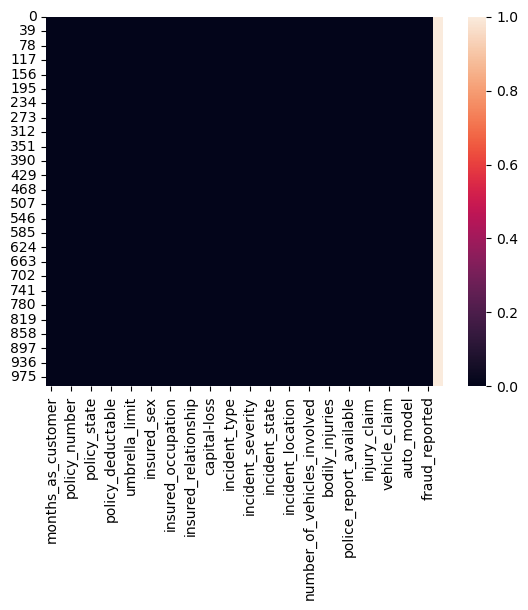

In [13]:
sns.heatmap(df.isnull())

In [14]:
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [15]:
df=df.drop('_c39',axis=1)
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
0         466132  ...         2                     YES              71610   
1         468176  ...         0                       ?               5070   
2         430632  ...         3                      NO              34650   
3         608117  ...         2                      NO              63400   
4         610706  ...         1                      NO               6500   
..           ...  ...       ...                     ...                ...   
995       431289  ...         1                       ?              87200   
996       608177  ...         3                       ?             108480   
997       442797  ...         3                     YES              67500   
998       441714  ...         1                     YES              46980   
999       612260  ...         3                       ?               5060   

    injury_claim property_claim  vehicle_claim   auto_make auto_model  \
0           6510          13020          52080        Saab        92x   
1            780            780           3510    Mercedes       E400   
2           7700           3850          23100       Dodge        RAM   
3           6340           6340          50720   Chevrolet      Tahoe   
4           1300            650           4550      Accura        RSX   
..           ...            ...            ...         ...        ...   
995        17440           8720          61040       Honda     Accord   
996        18080          18080          72320  Volkswagen     Passat   
997         7500           7500          52500      Suburu    Impreza   
998         5220           5220          36540        Audi         A5   
999          460            920           3680    Mercedes       E400   

    auto_year fraud_reported  
0        2004              Y  
1        2007              Y  
2        2007              N  
3        2014              Y  
4        2009              N  
..        ...            ...  
995      2006              N  
996      2015              N  
997      1996              N  
998      1998              N  
999      200

In [16]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [17]:
df['months_as_customer'].nunique()

391

In [18]:
df['age'].nunique()

46

In [19]:
df['policy_number'].nunique()

1000

In [20]:
df['policy_bind_date'].nunique()

951

In [21]:
df['policy_state'].nunique()

3

In [22]:
df['policy_csl'].nunique()

3

In [23]:
df['policy_deductable'].nunique()

3

In [24]:
df['policy_annual_premium'].nunique()

991

In [25]:
df['umbrella_limit'].nunique()

11

In [26]:
df['insured_zip'].nunique()

995

In [27]:
df['insured_sex'].nunique()

2

In [28]:
df['insured_education_level'].nunique()

7

In [29]:
df['insured_occupation'].nunique()

14

In [30]:
df['insured_hobbies'].nunique()

20

In [31]:
df['insured_relationship'].nunique()

6

In [32]:
df['capital-gains'].nunique()

338

In [33]:
df['capital-loss'].nunique()

354

In [34]:
df['incident_date'].nunique()

60

In [35]:
df['incident_type'].nunique()

4

In [36]:
df['collision_type'].nunique()

4

In [37]:
df['incident_severity'].nunique()

4

In [38]:
df['authorities_contacted'].nunique()

5

In [39]:
df['incident_state'].nunique()

7

In [40]:
df['incident_city'].nunique()

7

In [41]:
df['incident_location'].nunique()

1000

In [42]:
df['incident_hour_of_the_day'].nunique()

24

In [43]:
df['number_of_vehicles_involved'].nunique()

4

In [44]:
df['property_damage'].nunique()

3

In [45]:
df['bodily_injuries'].nunique()

3

In [46]:
df['witnesses'].nunique()

4

In [47]:
df['police_report_available'].nunique()

3

In [48]:
df['total_claim_amount'].nunique()

763

In [49]:
df['injury_claim'].nunique()

638

In [50]:
df['property_claim'].nunique()

626

In [51]:
df['vehicle_claim'].nunique()

726

In [52]:
df['auto_make'].nunique()

14

In [53]:
df['auto_model'].nunique()

39

In [54]:
df['auto_year'].nunique()

21

In [55]:
df['fraud_reported'].nunique()

2

In [56]:
df['months_as_customer'].nunique()

391

In [57]:
df.nunique().to_frame('No of unique values')

No of unique values
months_as_customer                           391
age                                           46
policy_number                               1000
policy_bind_date                             951
policy_state                                   3
policy_csl                                     3
policy_deductable                              3
policy_annual_premium                        991
umbrella_limit                                11
insured_zip                                  995
insured_sex                                    2
insured_education_level                        7
insured_occupation                            14
insured_hobbies                               20
insured_relationship                           6
capital-gains                                338
capital-loss                                 354
incident_date                                 60
incident_type                                  4
collision_type                                 4
incident_severity                              4
authorities_contacted                          5
incident_state                                 7
incident_city                                  7
incident_location                           1000
incident_hour_of_the_day                      24
number_of_vehicles_involved                    4
property_damage                                3
bodily_injuries                                3
witnesses                                      4
police_report_available                        3
total_claim_amount                           763
injury_claim                                 638
property_claim                               626
vehicle_claim                                726
auto_make                                     14
auto_model                                    39
auto_year                                     21
fraud_reported                                 2

In [58]:
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

Key Observations

1. The count of all the columns are equal indicating no missing value.
2. The mean of all the columns are greater than 50% of the data indicating presence of outliers.
3. The std deviation of columns 'months_as_customer','age','policy_number','policy_deductable','policy_annual_premium','insured_zip','capital-gains','capital-loss','total_claim_amount','injury_claim','property_claim','vehicle_claim' are highly spread.
4. The difference between 75% and max value of column 'capital-gains','total_claim_amount','injury_claim','property_claim' is very high indicating the presence of outliers

### Univariate Analysis

<AxesSubplot:xlabel='months_as_customer', ylabel='Count'>

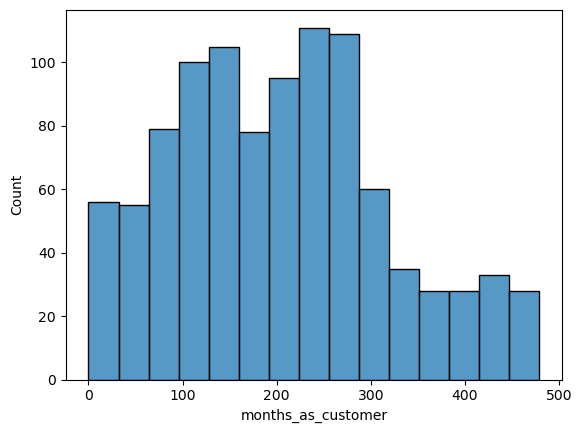

In [60]:
sns.histplot(df['months_as_customer'])

<AxesSubplot:xlabel='age', ylabel='Count'>

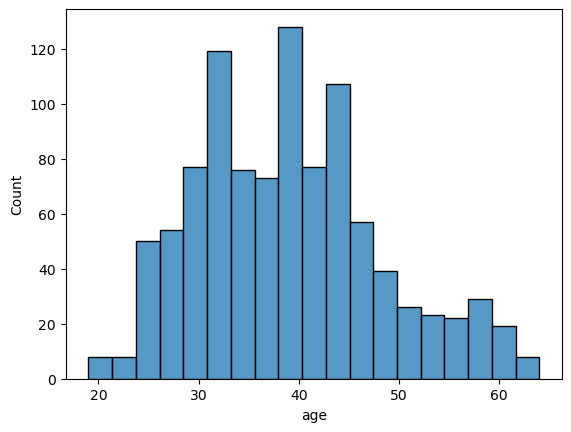

In [61]:
sns.histplot(df['age'])

<AxesSubplot:xlabel='policy_number', ylabel='Count'>

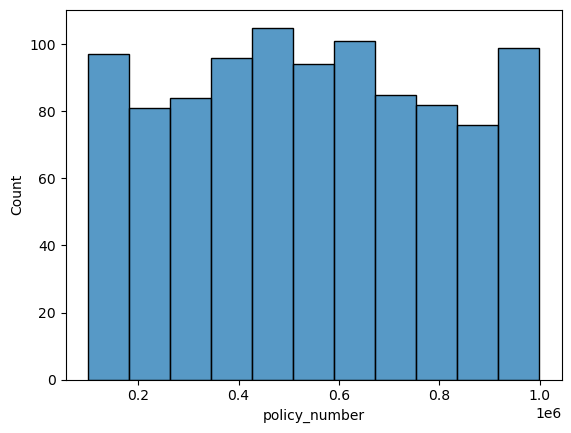

In [62]:
sns.histplot(df['policy_number'])

<AxesSubplot:xlabel='policy_bind_date', ylabel='Count'>

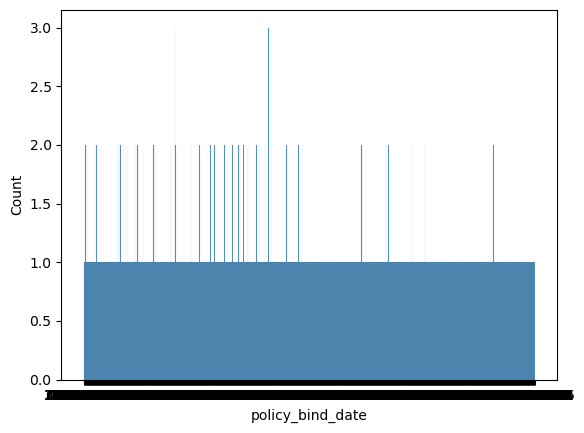

In [63]:
sns.histplot(df['policy_bind_date'])

<AxesSubplot:xlabel='policy_state', ylabel='Count'>

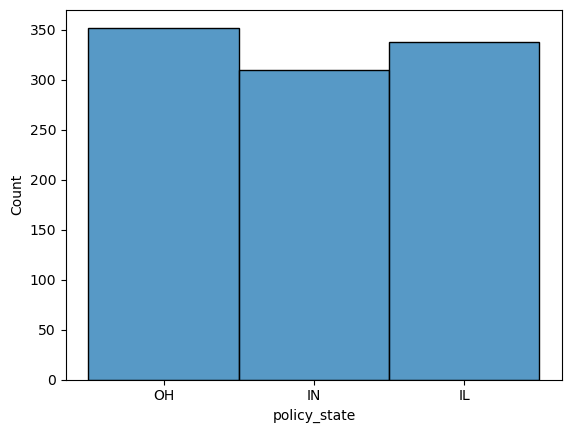

In [64]:
sns.histplot(df['policy_state'])

<AxesSubplot:xlabel='policy_csl', ylabel='Count'>

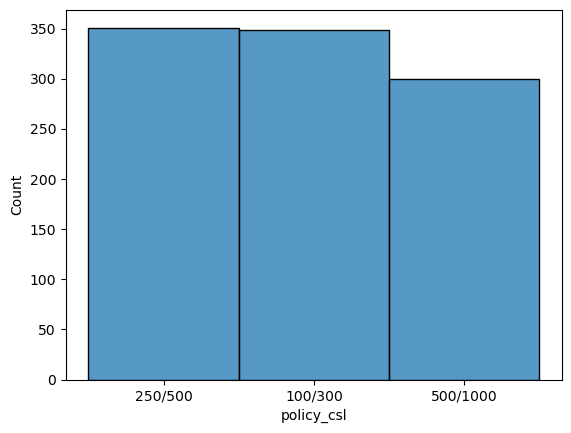

In [65]:
sns.histplot(df['policy_csl'])

<AxesSubplot:xlabel='policy_deductable', ylabel='Count'>

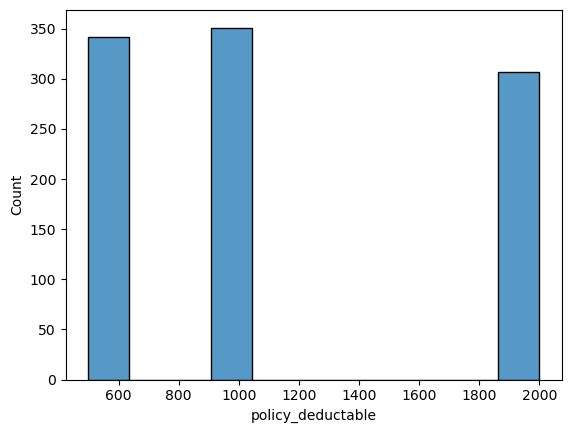

In [66]:
sns.histplot(df['policy_deductable'])

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Count'>

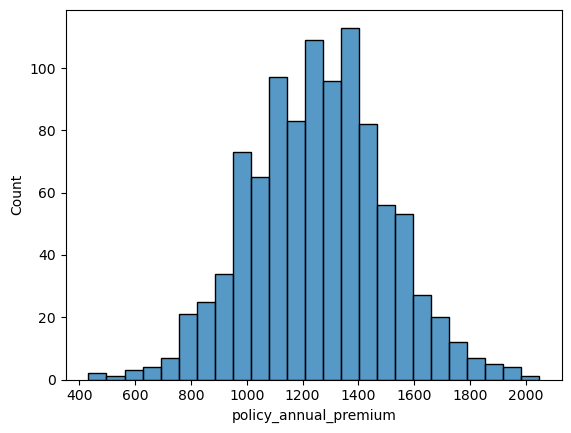

In [67]:
sns.histplot(df['policy_annual_premium'])

<AxesSubplot:xlabel='umbrella_limit', ylabel='Count'>

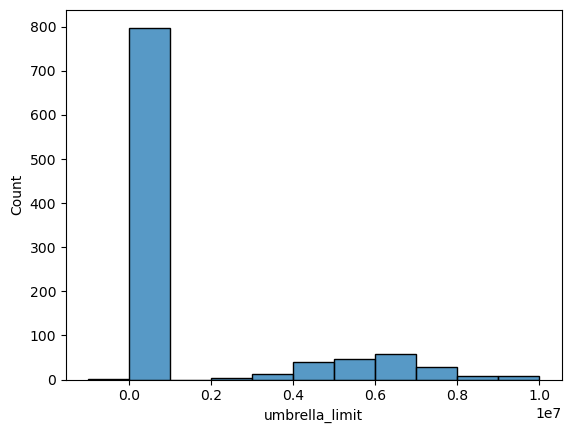

In [68]:
sns.histplot(df['umbrella_limit'])

<AxesSubplot:xlabel='insured_zip', ylabel='Count'>

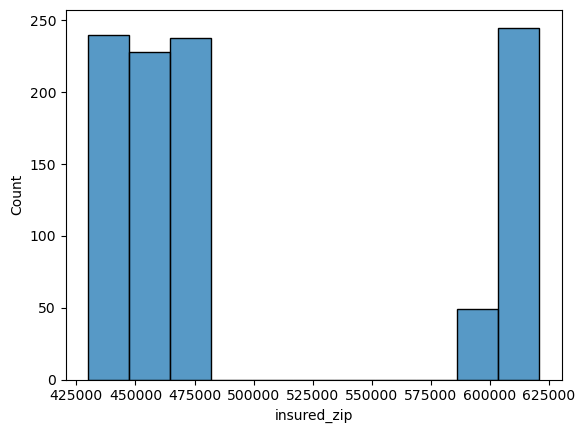

In [69]:
sns.histplot(df['insured_zip'])

<AxesSubplot:xlabel='insured_sex', ylabel='Count'>

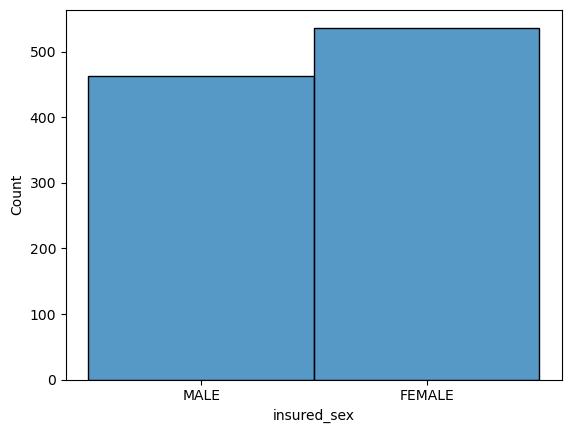

In [70]:
sns.histplot(df['insured_sex'])

<AxesSubplot:xlabel='insured_education_level', ylabel='Count'>

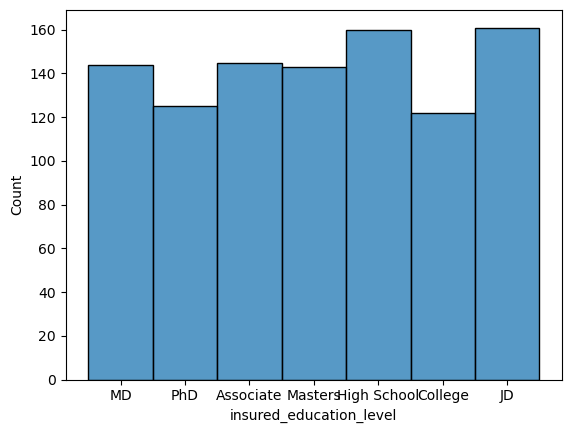

In [71]:
sns.histplot(df['insured_education_level'])

<AxesSubplot:xlabel='insured_occupation', ylabel='Count'>

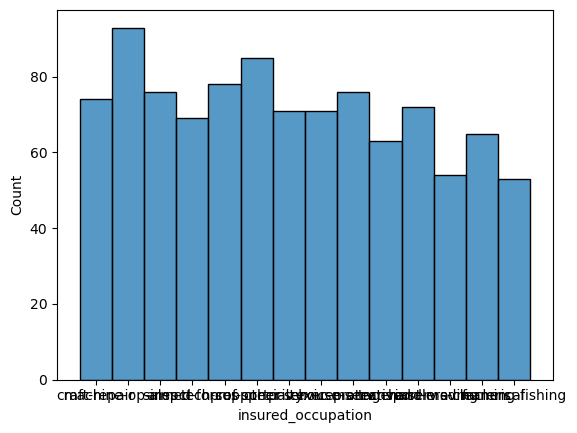

In [72]:
sns.histplot(df['insured_occupation'])

<AxesSubplot:xlabel='insured_hobbies', ylabel='Count'>

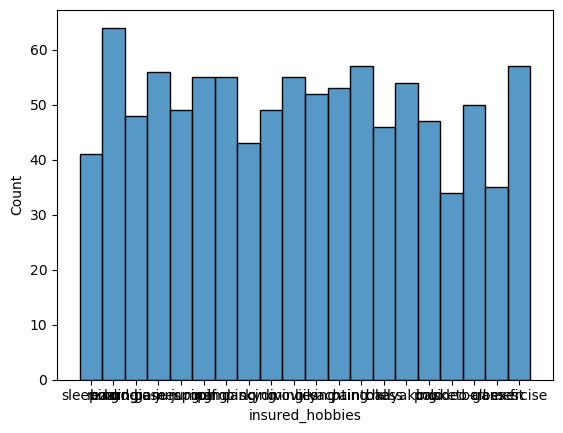

In [73]:
sns.histplot(df['insured_hobbies'])

<AxesSubplot:xlabel='insured_relationship', ylabel='Count'>

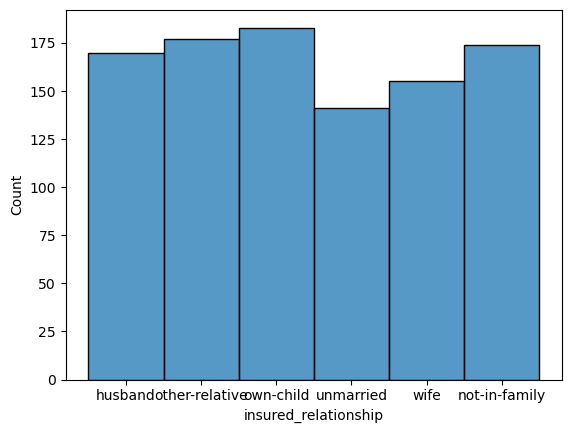

In [74]:
sns.histplot(df['insured_relationship'])

<AxesSubplot:xlabel='capital-gains', ylabel='Count'>

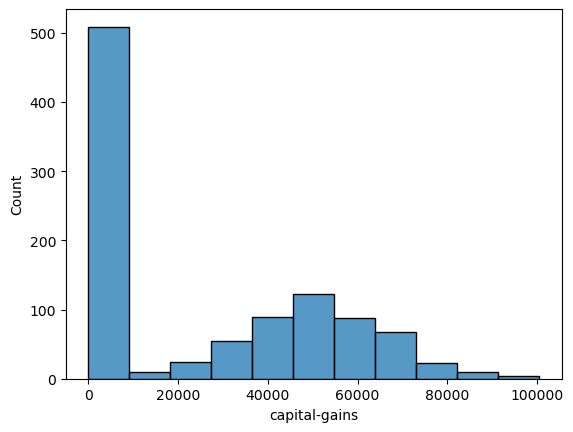

In [75]:
sns.histplot(df['capital-gains'])

<AxesSubplot:xlabel='capital-loss', ylabel='Count'>

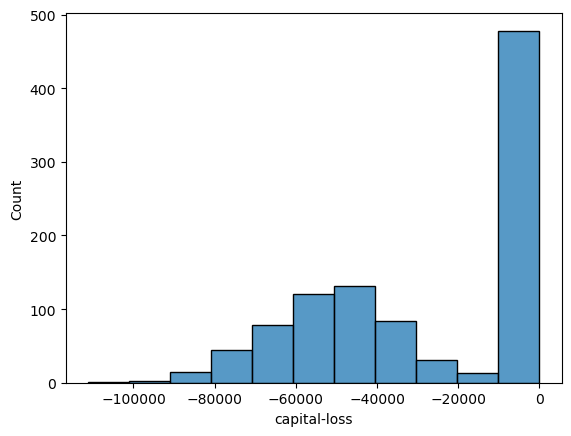

In [76]:
sns.histplot(df['capital-loss'])

<AxesSubplot:xlabel='incident_date', ylabel='Count'>

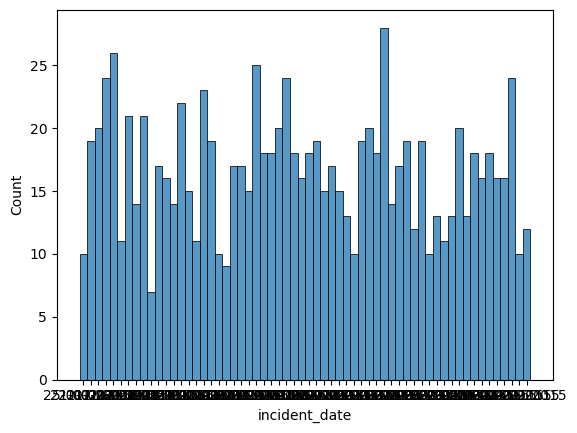

In [77]:
sns.histplot(df['incident_date'])

<AxesSubplot:xlabel='incident_type', ylabel='Count'>

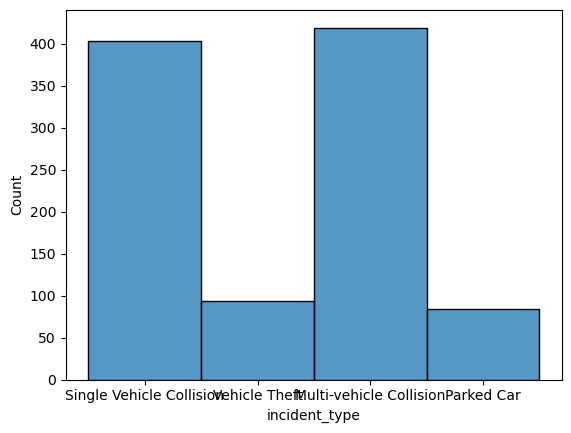

In [78]:
sns.histplot(df['incident_type'])

<AxesSubplot:xlabel='collision_type', ylabel='Count'>

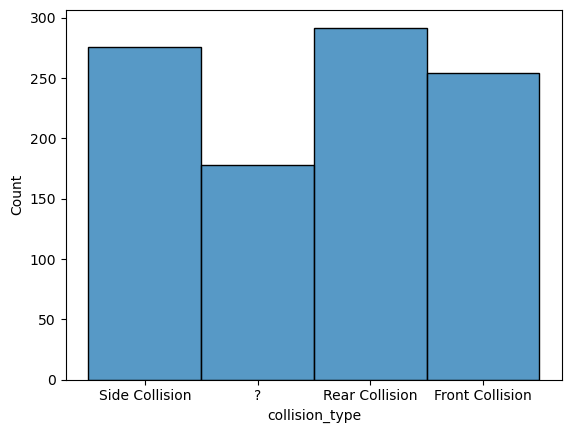

In [79]:
sns.histplot(df['collision_type'])

<AxesSubplot:xlabel='incident_severity', ylabel='Count'>

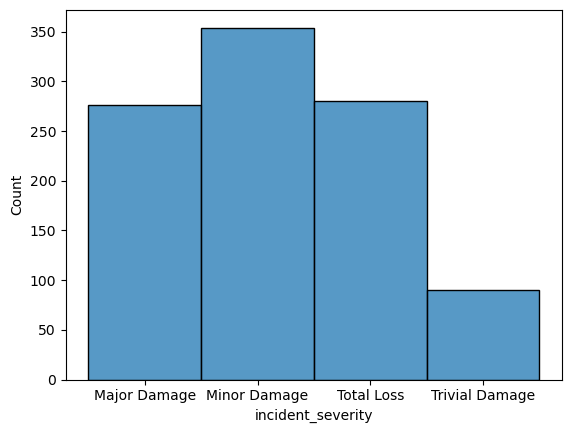

In [80]:
sns.histplot(df['incident_severity'])

<AxesSubplot:xlabel='authorities_contacted', ylabel='Count'>

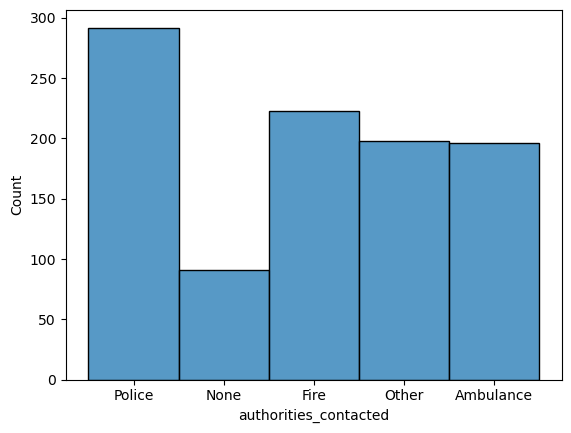

In [81]:
sns.histplot(df['authorities_contacted'])

<AxesSubplot:xlabel='incident_state', ylabel='Count'>

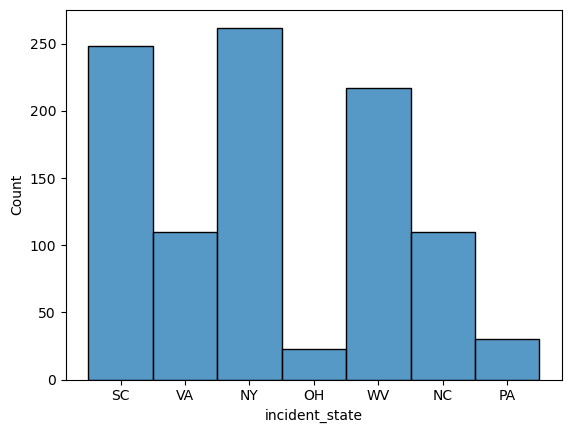

In [82]:
sns.histplot(df['incident_state'])

<AxesSubplot:xlabel='incident_city', ylabel='Count'>

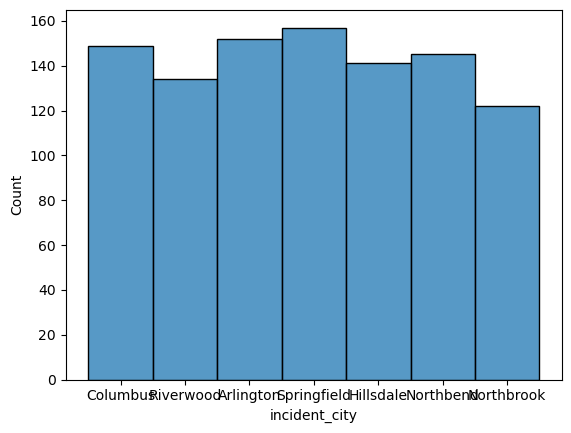

In [83]:
sns.histplot(df['incident_city'])

<AxesSubplot:xlabel='incident_location', ylabel='Count'>

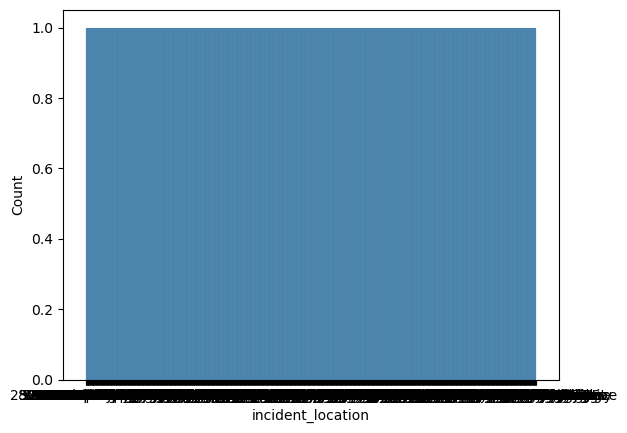

In [84]:
sns.histplot(df['incident_location'])

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='Count'>

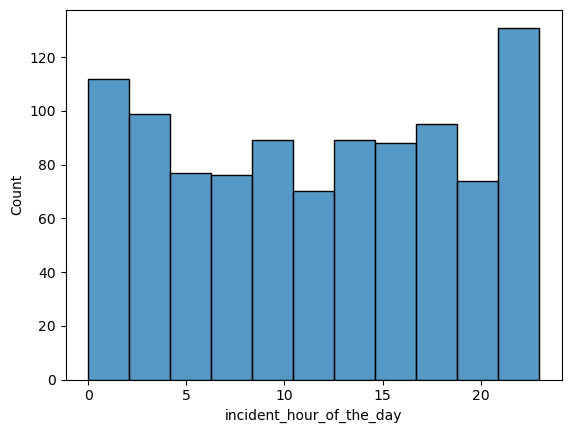

In [85]:
sns.histplot(df['incident_hour_of_the_day'])

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='Count'>

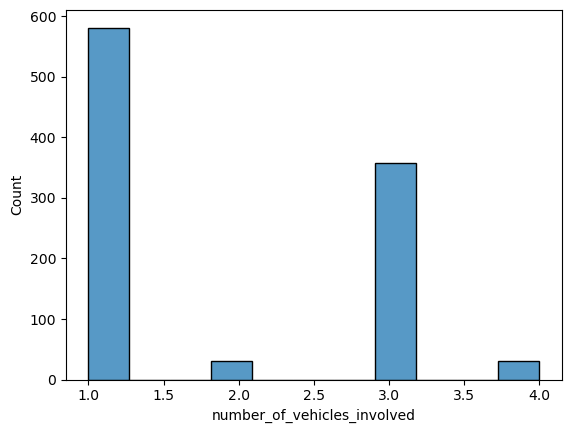

In [86]:
sns.histplot(df['number_of_vehicles_involved'])

<AxesSubplot:xlabel='property_damage', ylabel='Count'>

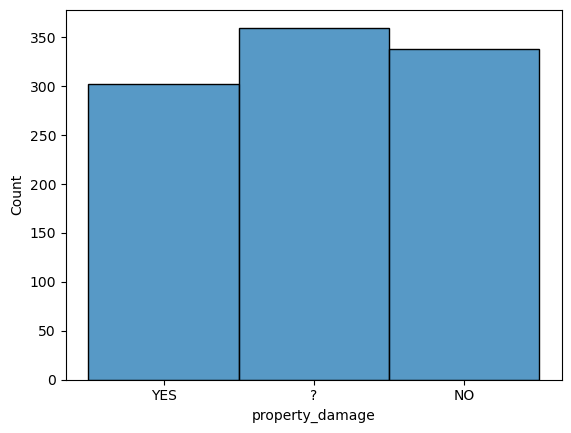

In [87]:
sns.histplot(df['property_damage'])

<AxesSubplot:xlabel='bodily_injuries', ylabel='Count'>

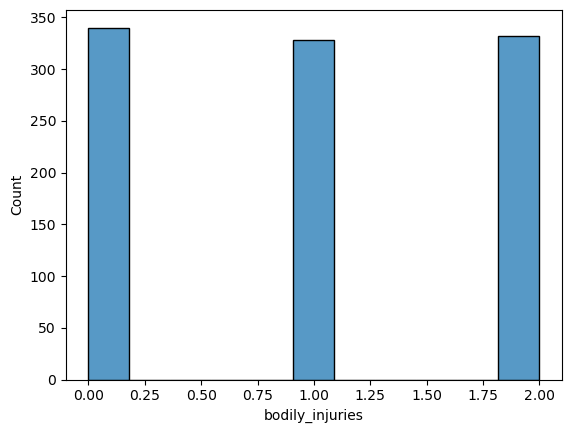

In [88]:
sns.histplot(df['bodily_injuries'])

<AxesSubplot:xlabel='witnesses', ylabel='Count'>

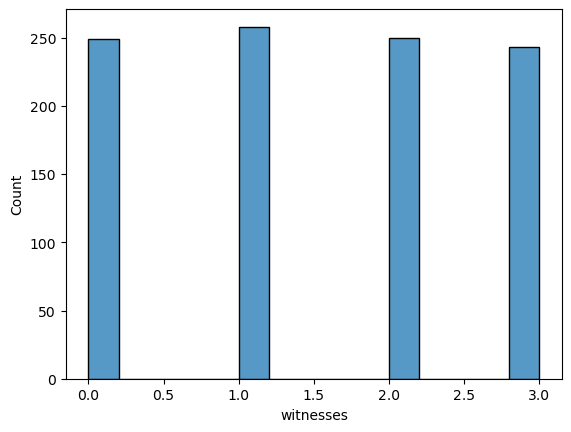

In [89]:
sns.histplot(df['witnesses'])

<AxesSubplot:xlabel='police_report_available', ylabel='Count'>

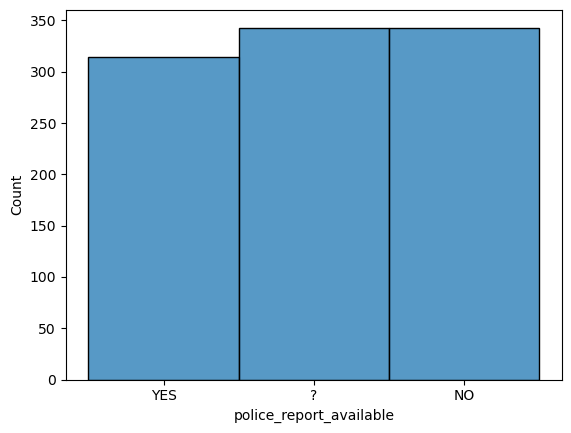

In [90]:
sns.histplot(df['police_report_available'])

<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

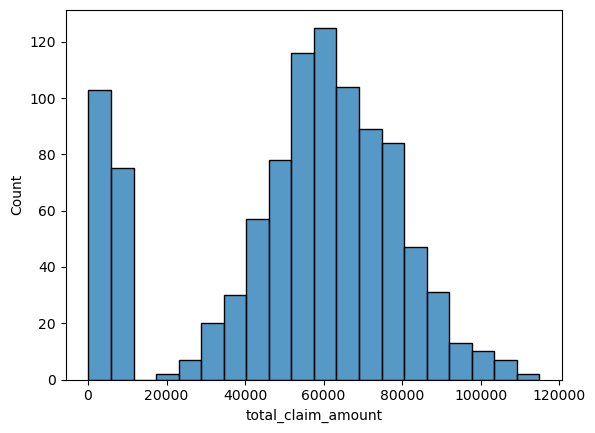

In [91]:
sns.histplot(df['total_claim_amount'])

<AxesSubplot:xlabel='injury_claim', ylabel='Count'>

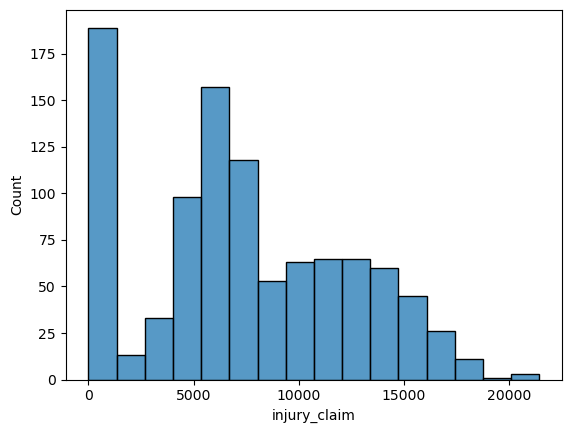

In [92]:
sns.histplot(df['injury_claim'])

<AxesSubplot:xlabel='property_claim', ylabel='Count'>

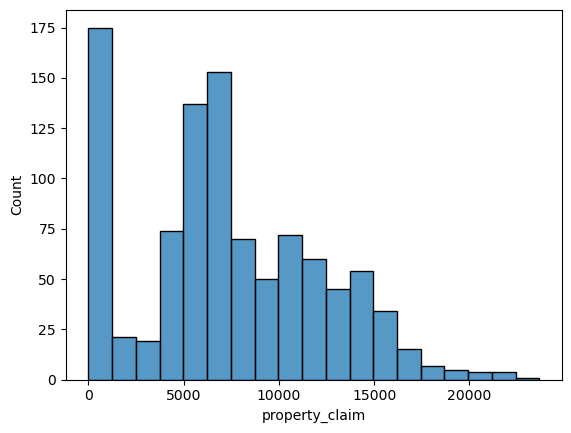

In [93]:
sns.histplot(df['property_claim'])

<AxesSubplot:xlabel='vehicle_claim', ylabel='Count'>

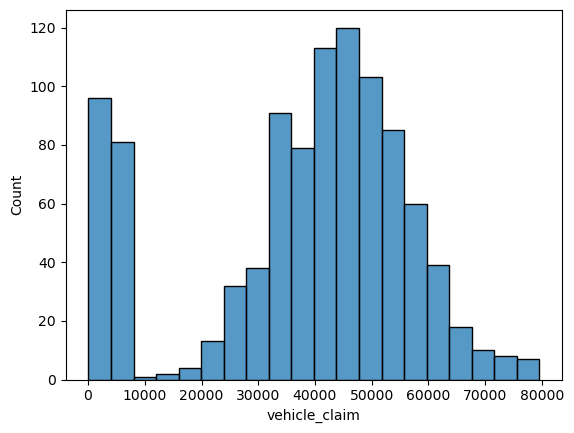

In [94]:
sns.histplot(df['vehicle_claim'])

<AxesSubplot:xlabel='auto_make', ylabel='Count'>

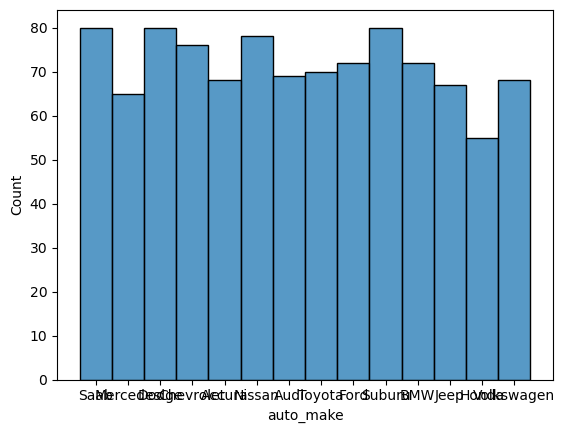

In [95]:
sns.histplot(df['auto_make'])

<AxesSubplot:xlabel='auto_model', ylabel='Count'>

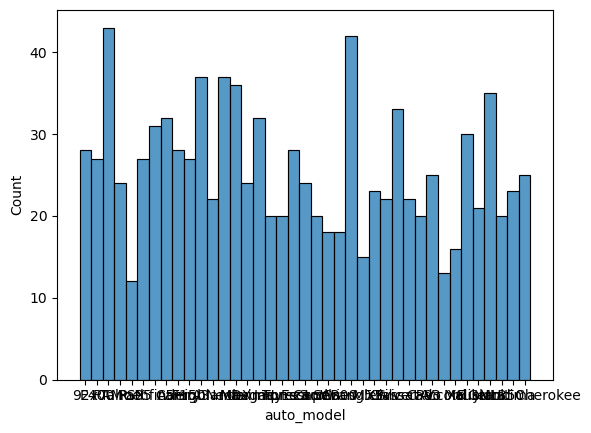

In [96]:
sns.histplot(df['auto_model'])

<AxesSubplot:xlabel='auto_year', ylabel='Count'>

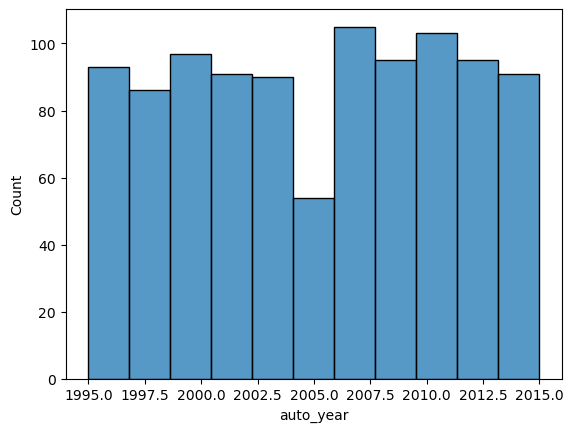

In [97]:
sns.histplot(df['auto_year'])

<AxesSubplot:xlabel='fraud_reported', ylabel='Count'>

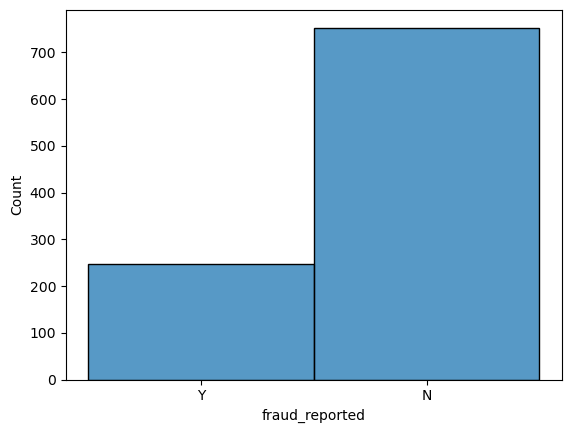

In [98]:
sns.histplot(df['fraud_reported'])

<AxesSubplot:xlabel='vehicle_claim', ylabel='Count'>

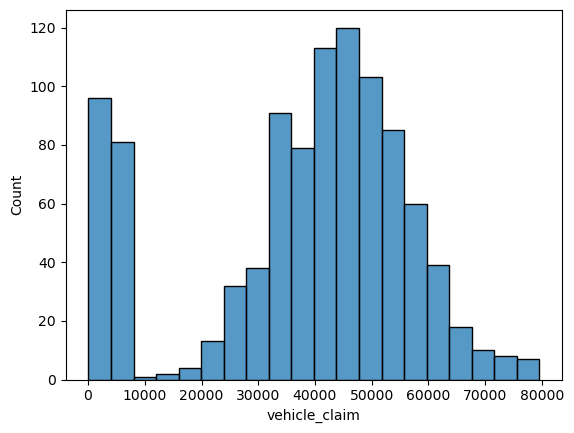

In [99]:
sns.histplot(df['vehicle_claim'])

### Bivariate Analysis

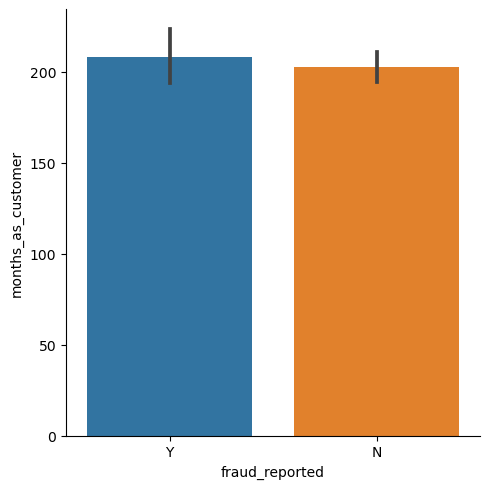

In [101]:
sns.catplot(y='months_as_customer',x='fraud_reported',data=df,kind='bar')

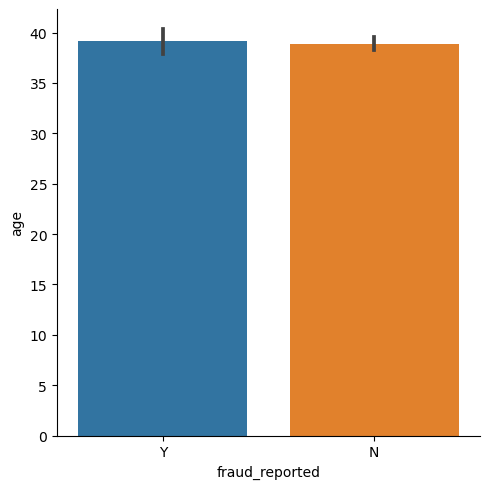

In [102]:
sns.catplot(y='age',x='fraud_reported',data=df,kind='bar')

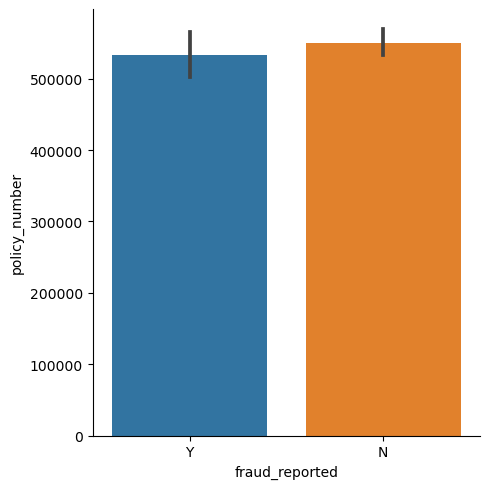

In [103]:
sns.catplot(y='policy_number',x='fraud_reported',data=df,kind='bar')

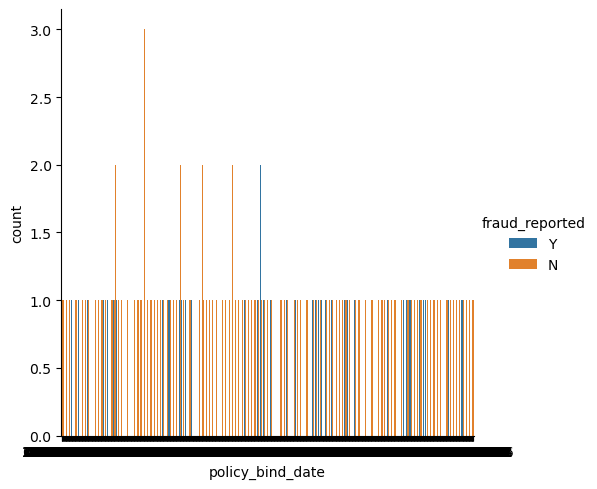

In [104]:
sns.catplot(x='policy_bind_date',hue='fraud_reported',data=df,kind='count')

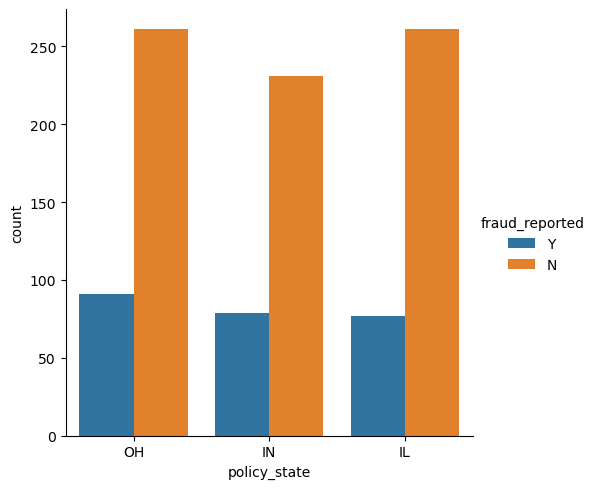

In [105]:
sns.catplot(x='policy_state',hue='fraud_reported',data=df,kind='count')

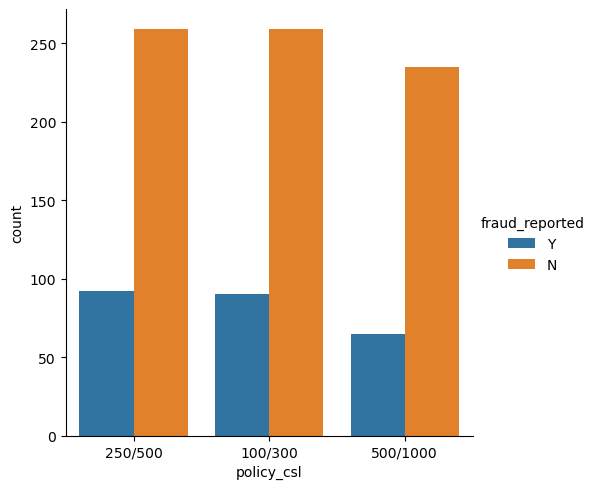

In [106]:
sns.catplot(x='policy_csl',hue='fraud_reported',data=df,kind='count')

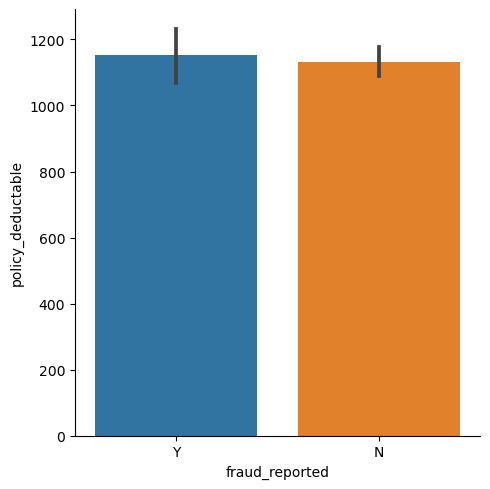

In [107]:
sns.catplot(y='policy_deductable',x='fraud_reported',data=df,kind='bar')

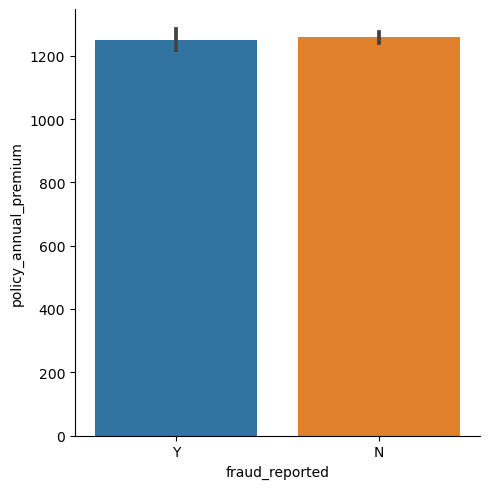

In [108]:
sns.catplot(y='policy_annual_premium',x='fraud_reported',data=df,kind='bar')

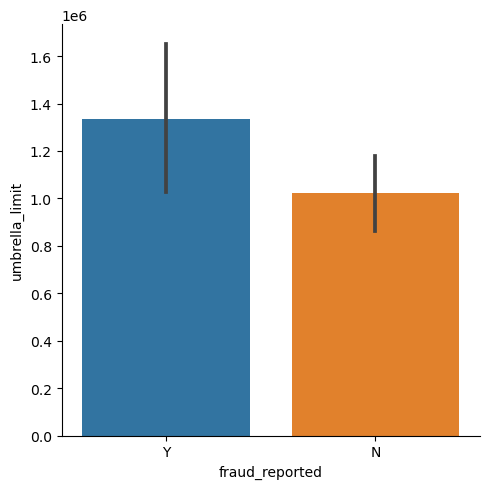

In [109]:
sns.catplot(y='umbrella_limit',x='fraud_reported',data=df,kind='bar')

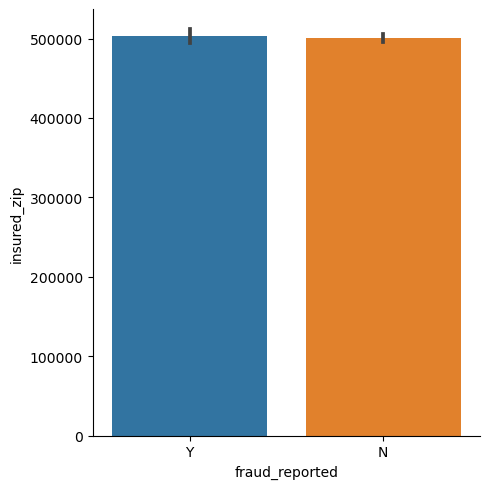

In [110]:
sns.catplot(y='insured_zip',x='fraud_reported',data=df,kind='bar')

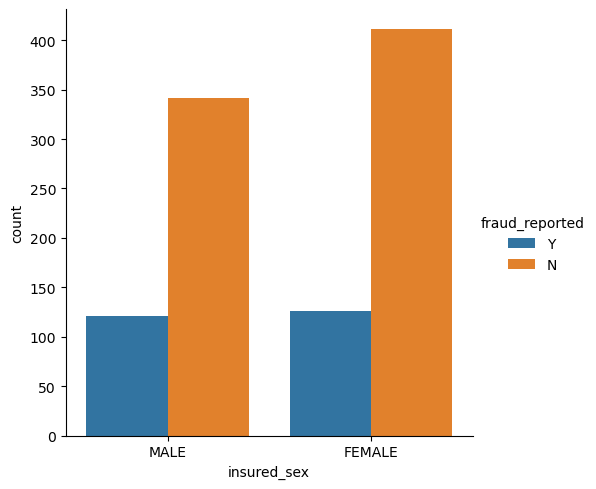

In [111]:
sns.catplot(x='insured_sex',hue='fraud_reported',data=df,kind='count')

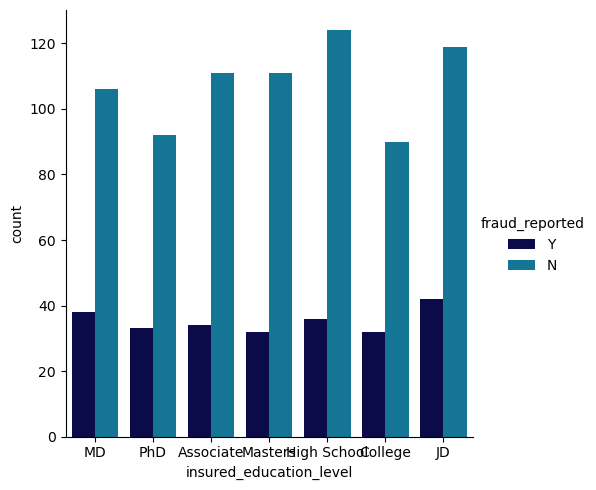

In [112]:
sns.catplot(x='insured_education_level',hue='fraud_reported',data=df,kind='count',palette='ocean')

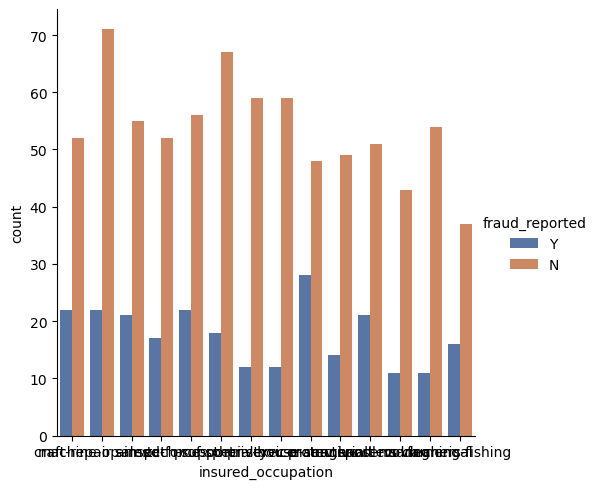

In [113]:
sns.catplot(x='insured_occupation',hue='fraud_reported',data=df,kind='count',palette='deep')

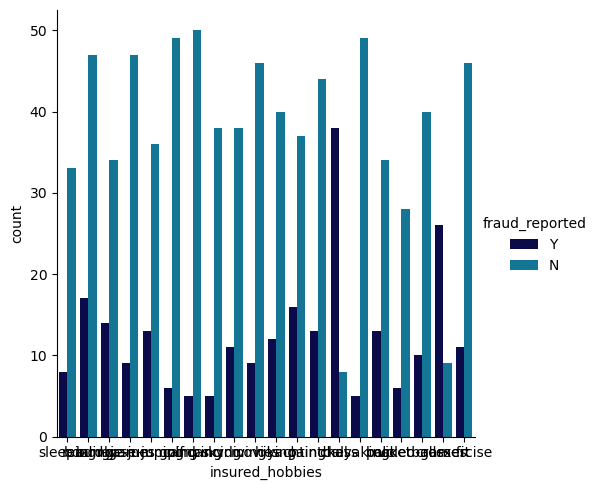

In [114]:
sns.catplot(x='insured_hobbies',hue='fraud_reported',data=df,kind='count',palette='ocean')

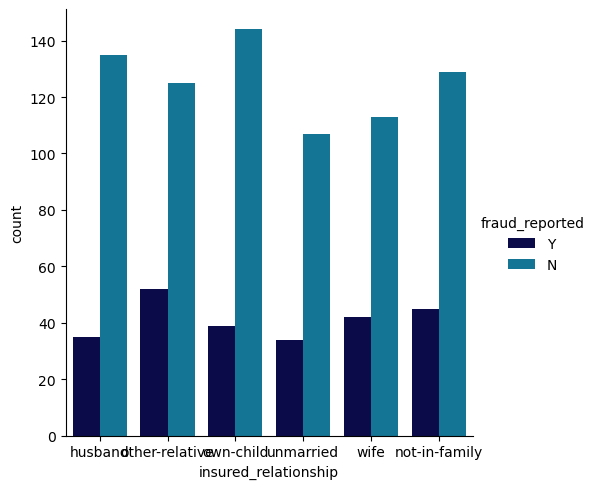

In [115]:
sns.catplot(x='insured_relationship',hue='fraud_reported',data=df,kind='count',palette='ocean')

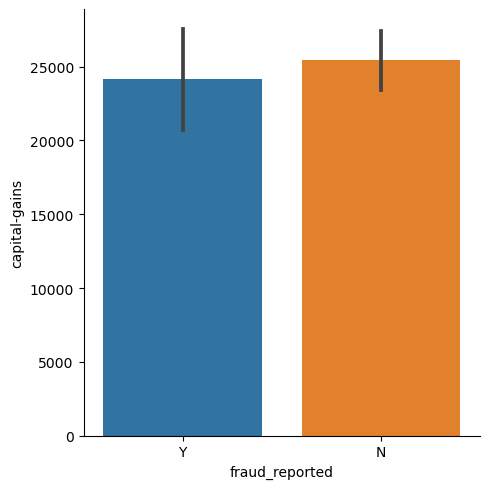

In [116]:
sns.catplot(y='capital-gains',x='fraud_reported',data=df,kind='bar')

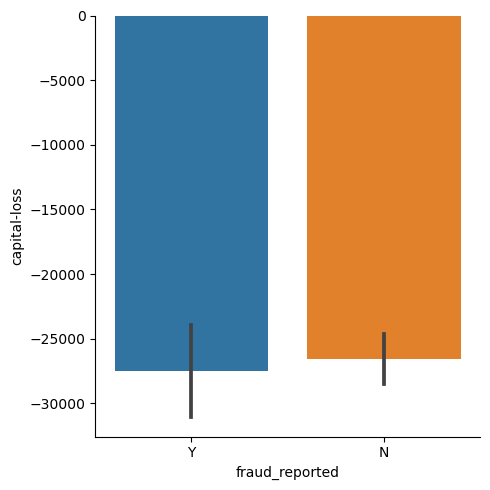

In [117]:
sns.catplot(y='capital-loss',x='fraud_reported',data=df,kind='bar')

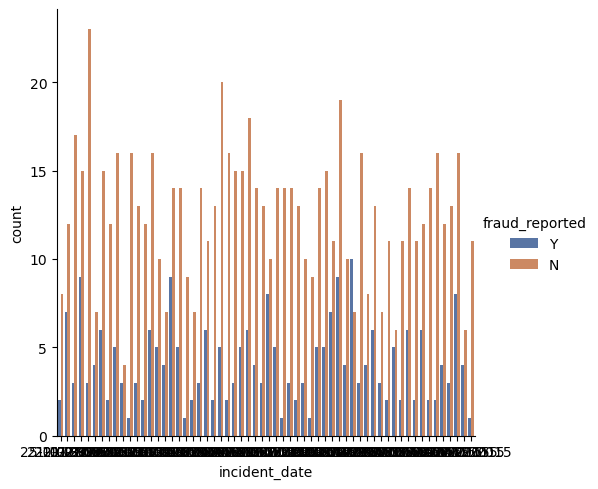

In [118]:
sns.catplot(x='incident_date',hue='fraud_reported',data=df,kind='count',palette='deep')

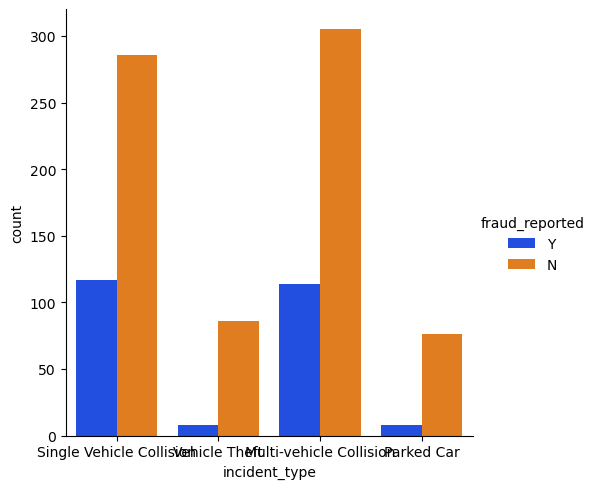

In [119]:
sns.catplot(x='incident_type',hue='fraud_reported',data=df,kind='count',palette='bright')

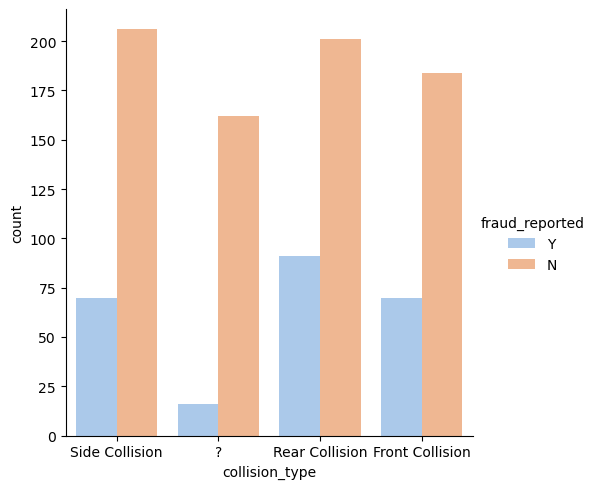

In [120]:
sns.catplot(x='collision_type',hue='fraud_reported',data=df,kind='count',palette='pastel')

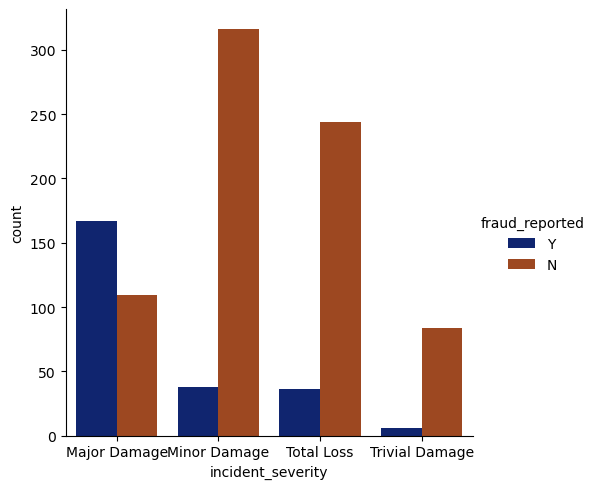

In [121]:
sns.catplot(x='incident_severity',hue='fraud_reported',data=df,kind='count',palette='dark')

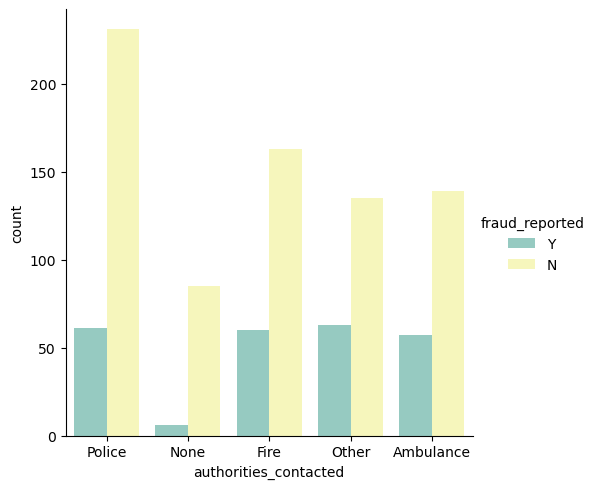

In [122]:
sns.catplot(x='authorities_contacted',hue='fraud_reported',data=df,kind='count',palette='Set3')

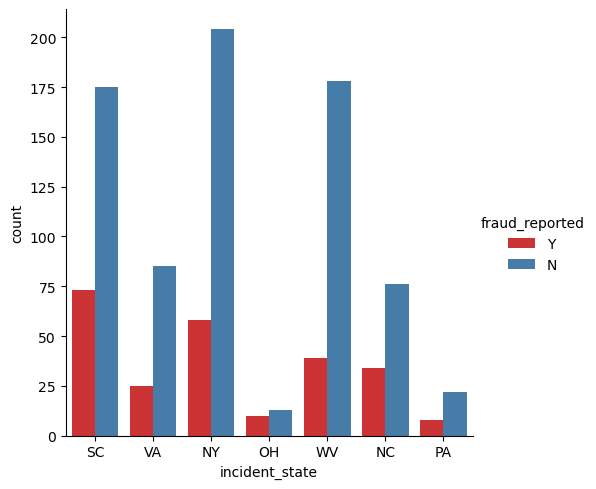

In [123]:
sns.catplot(x='incident_state',hue='fraud_reported',data=df,kind='count',palette='Set1')

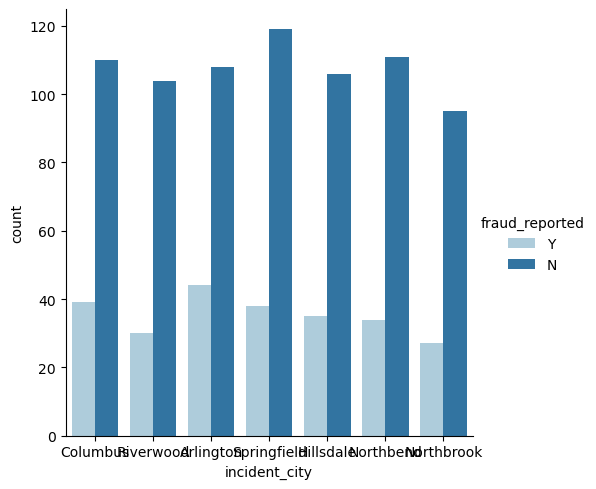

In [124]:
sns.catplot(x='incident_city',hue='fraud_reported',data=df,kind='count',palette='Paired')

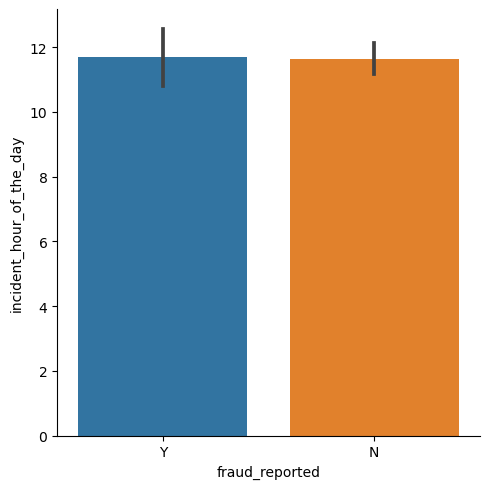

In [125]:
sns.catplot(y='incident_hour_of_the_day',x='fraud_reported',data=df,kind='bar')

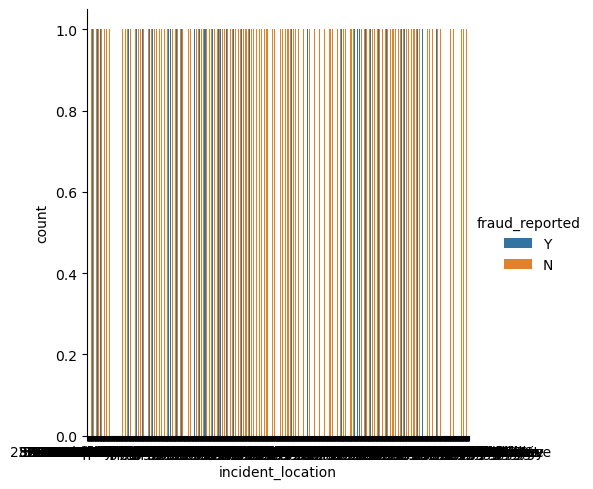

In [126]:
sns.catplot(x='incident_location',hue='fraud_reported',data=df,kind='count')

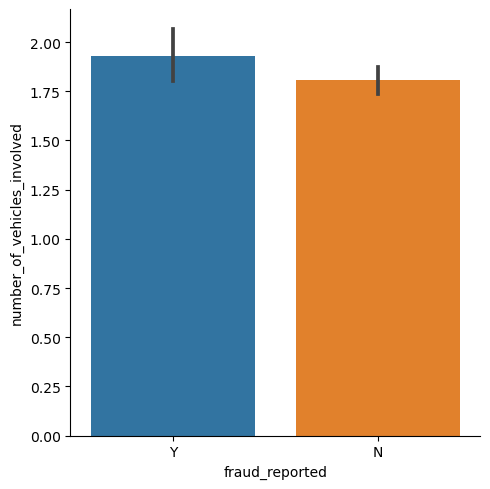

In [127]:
sns.catplot(y='number_of_vehicles_involved',x='fraud_reported',data=df,kind='bar')

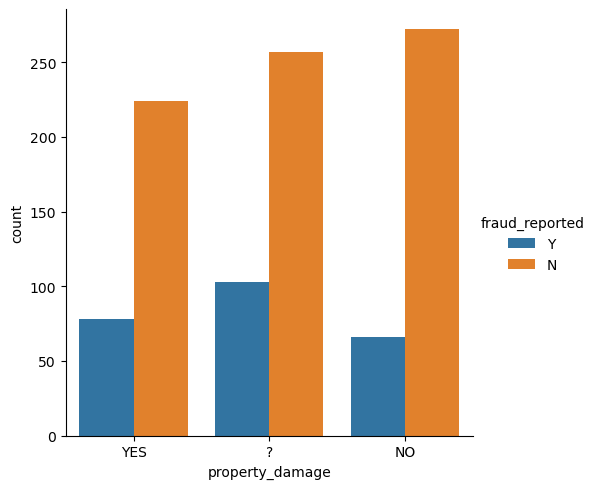

In [128]:
sns.catplot(x='property_damage',hue='fraud_reported',data=df,kind='count')

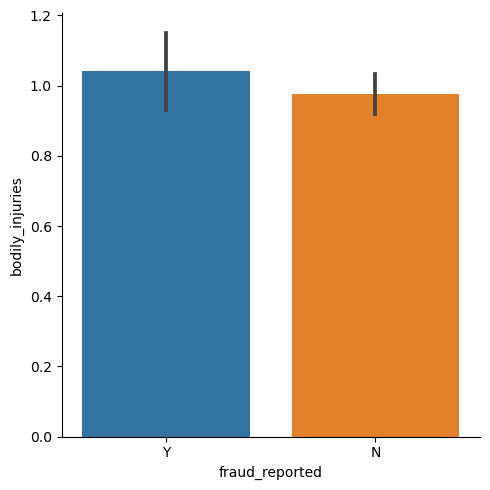

In [129]:
sns.catplot(y='bodily_injuries',x='fraud_reported',data=df,kind='bar')

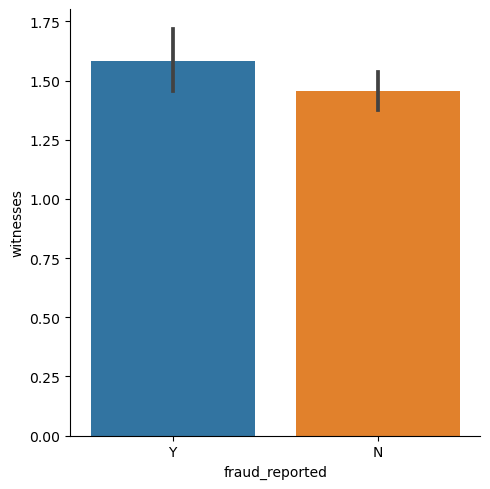

In [130]:
sns.catplot(y='witnesses',x='fraud_reported',data=df,kind='bar')

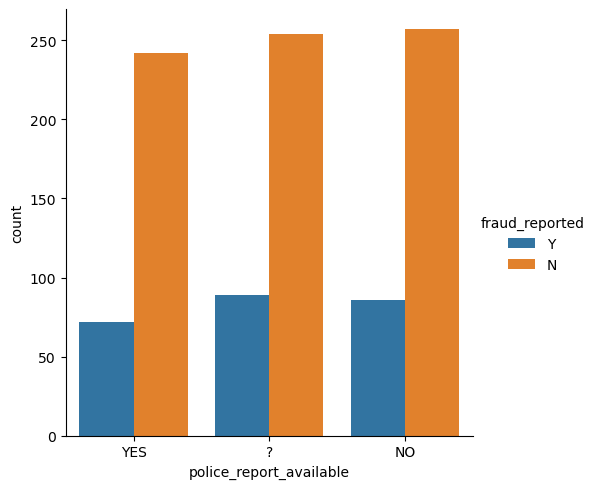

In [131]:
sns.catplot(x='police_report_available',hue='fraud_reported',data=df,kind='count')

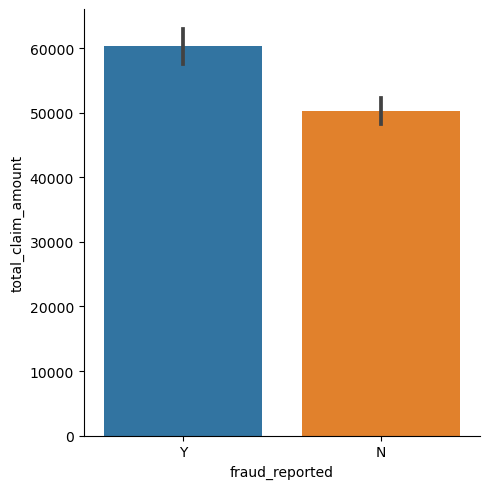

In [132]:
sns.catplot(y='total_claim_amount',x='fraud_reported',data=df,kind='bar')

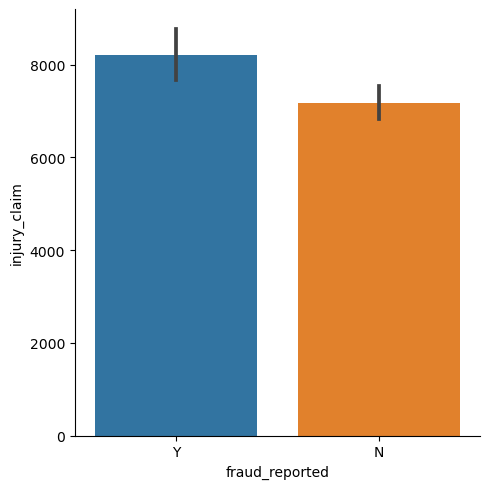

In [133]:
sns.catplot(y='injury_claim',x='fraud_reported',data=df,kind='bar')

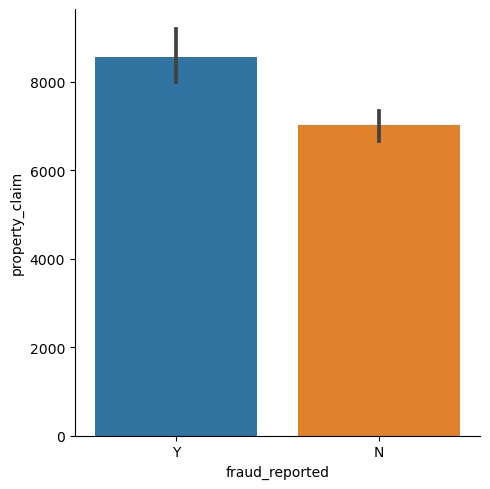

In [134]:
sns.catplot(y='property_claim',x='fraud_reported',data=df,kind='bar')

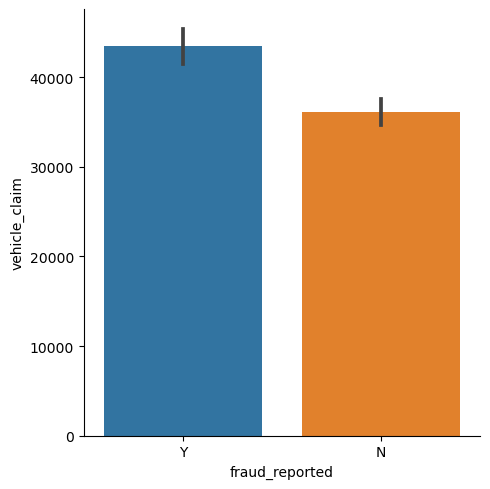

In [135]:
sns.catplot(y='vehicle_claim',x='fraud_reported',data=df,kind='bar')

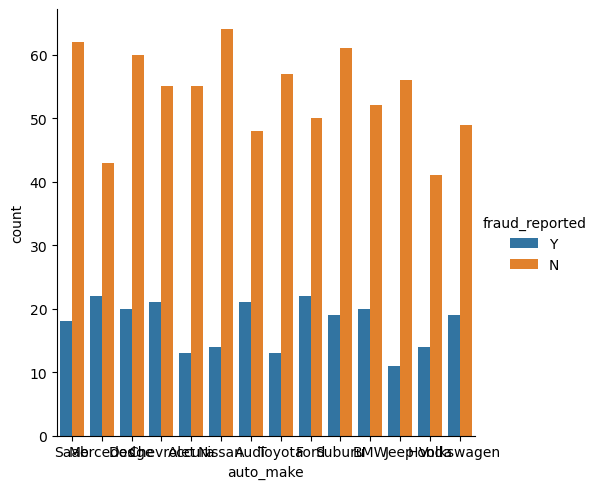

In [136]:
sns.catplot(x='auto_make', hue='fraud_reported', data=df, kind='count')

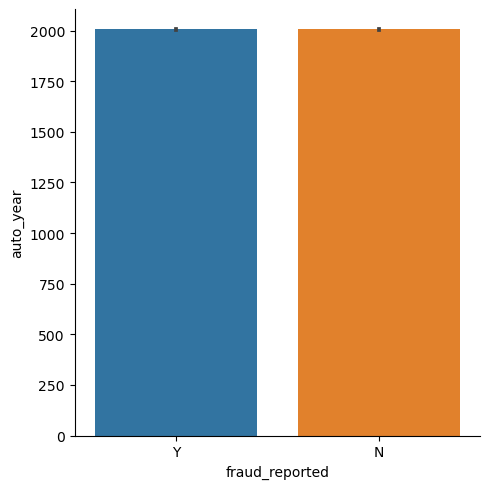

In [137]:
sns.catplot(y='auto_year',x='fraud_reported',data=df,kind='bar')

### Multivariate Analysis

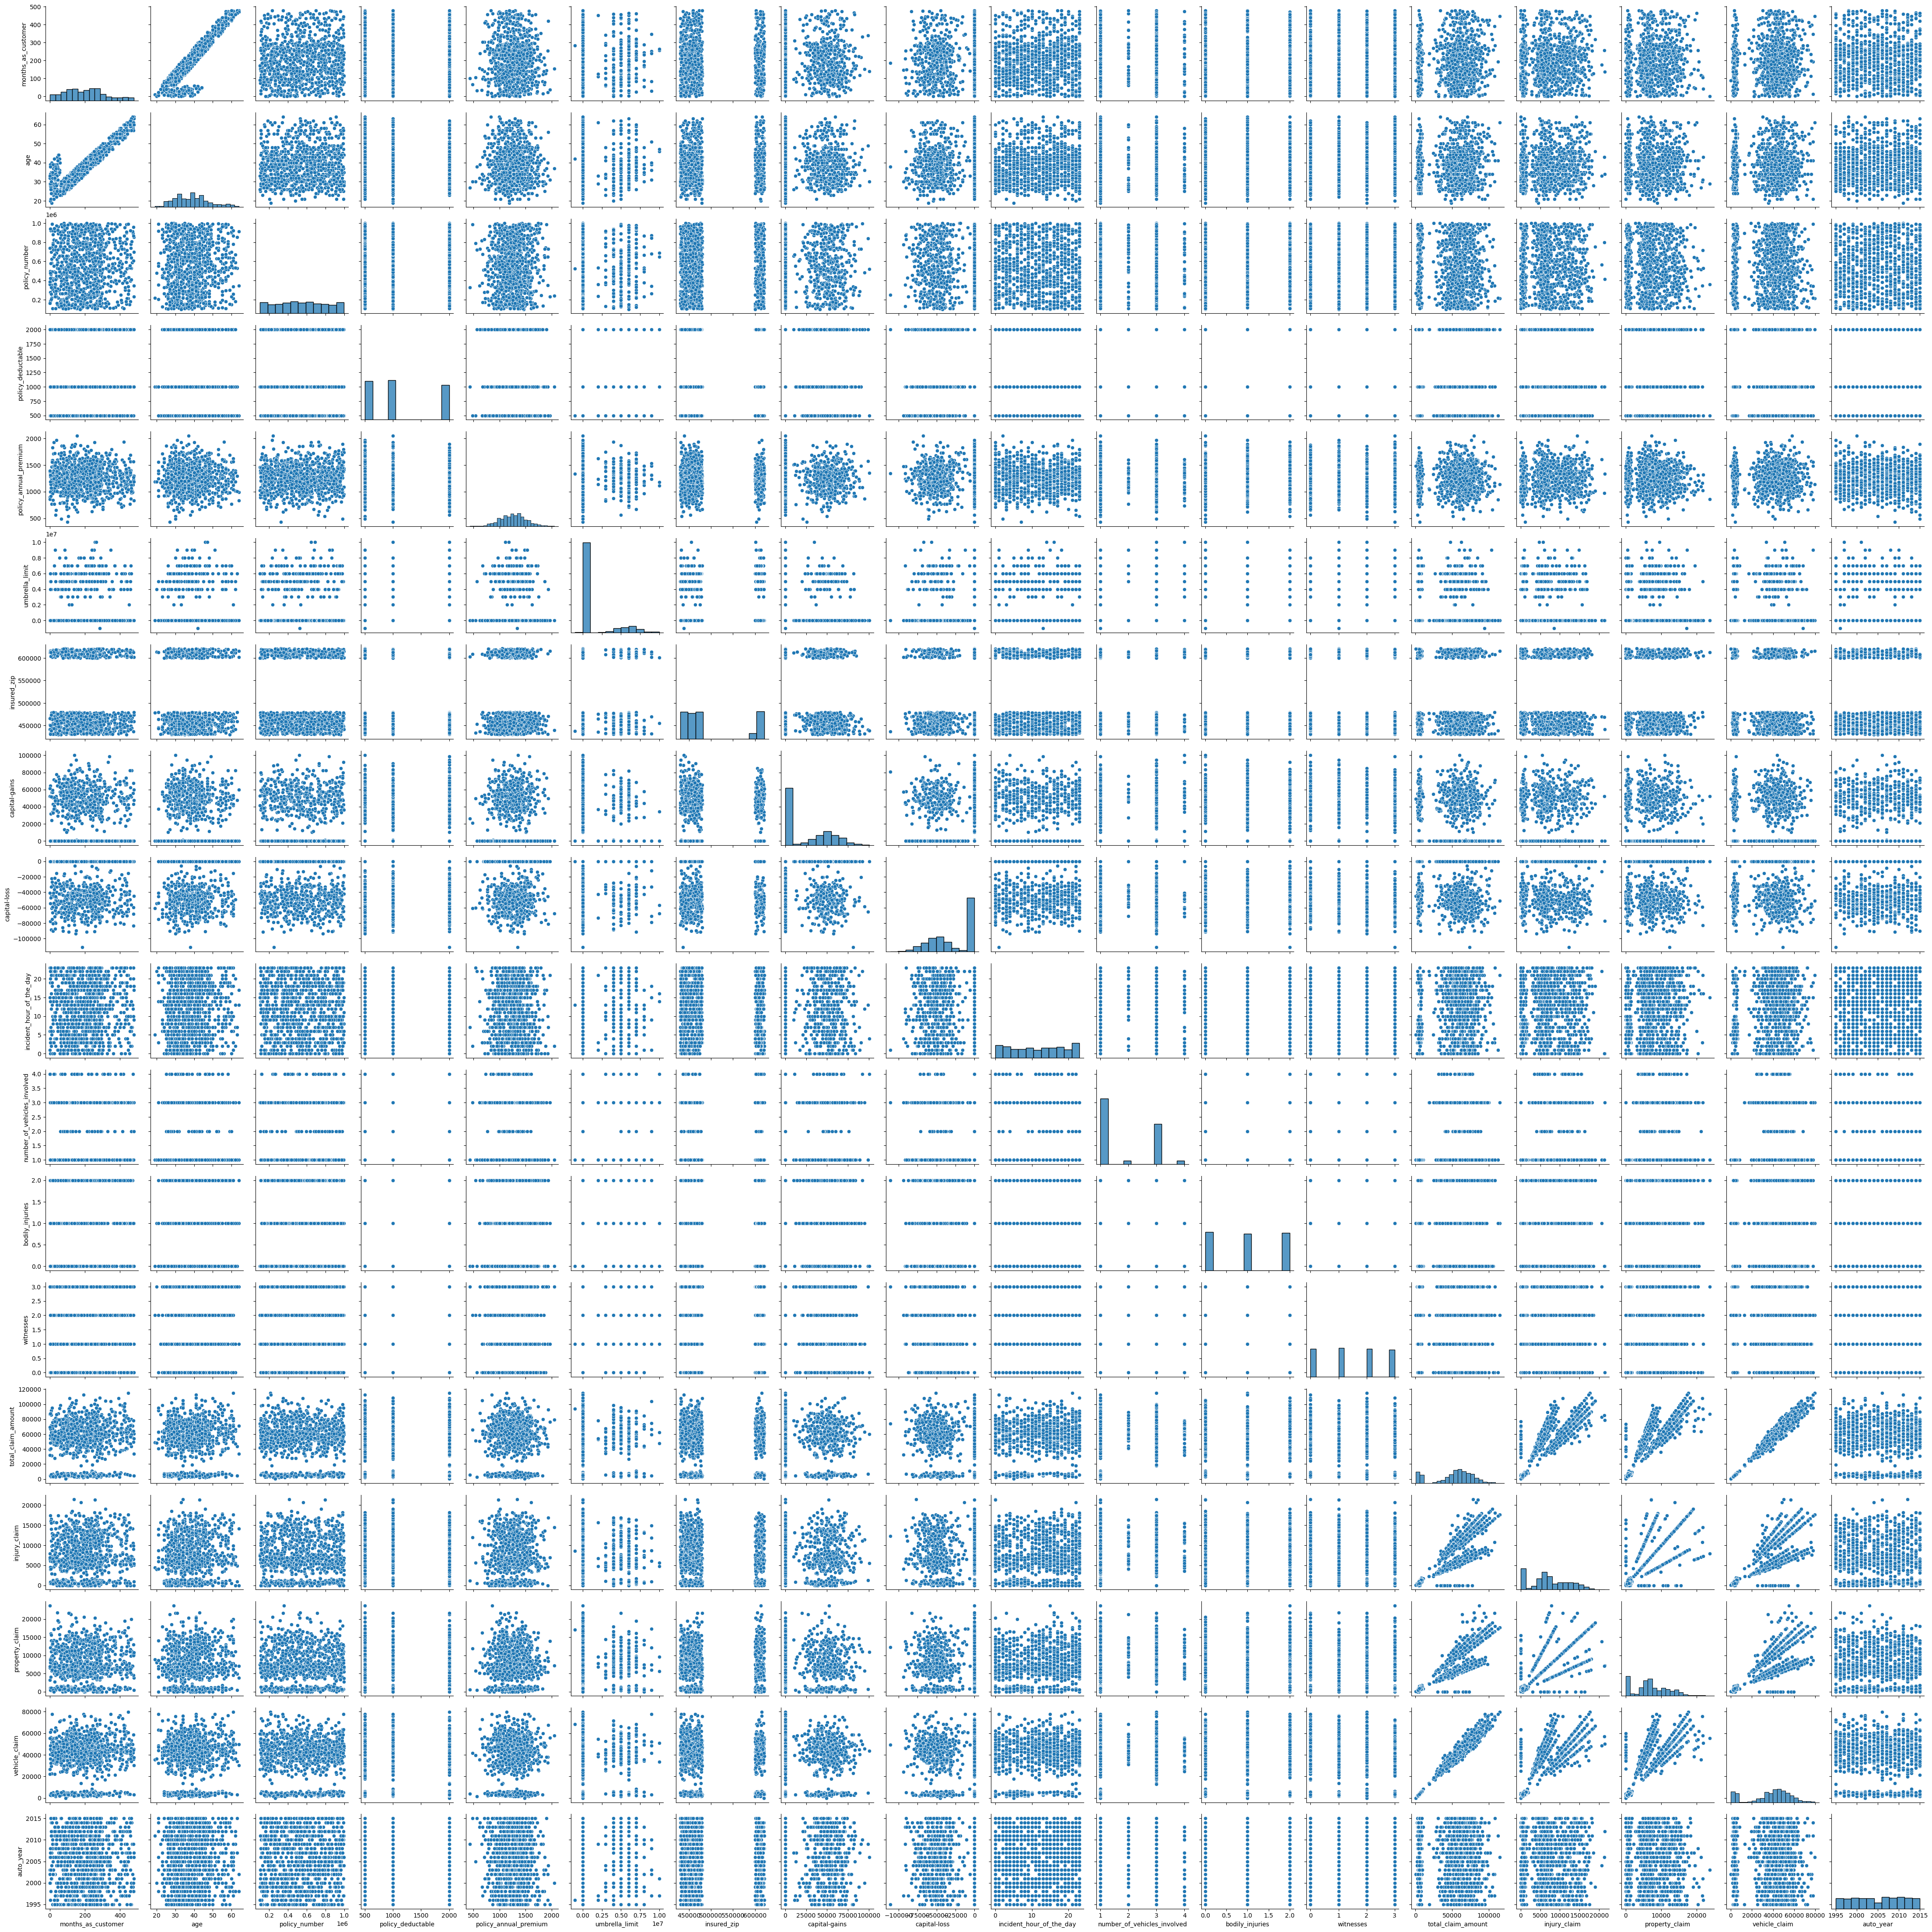

In [138]:
sns.pairplot(df,palette='ocean')

### Checking Correlation

In [139]:
corr=df.corr()
corr

months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.922098       0.057555   
age                                    0.922098  1.000000       0.059413   
policy_number                          0.057555  0.059413       1.000000   
policy_deductable                      0.026807  0.029188      -0.006738   
policy_annual_premium                  0.005018  0.014404       0.022566   
umbrella_limit                         0.015498  0.018126       0.008968   
insured_zip                            0.017895  0.025604       0.007083   
capital-gains                          0.006399 -0.007075       0.009802   
capital-loss                           0.020209  0.007368      -0.005669   
incident_hour_of_the_day               0.070639  0.087161       0.000113   
number_of_vehicles_involved            0.014736  0.022102       0.013432   
bodily_injuries                       -0.010162 -0.015679      -0.004558   
witnesses                              0.058383  0.052359      -0.012661   
total_claim_amount                     0.062108  0.069863      -0.018009   
injury_claim                           0.065329  0.075522      -0.008762   
property_claim                         0.034940  0.060898      -0.010678   
vehicle_claim                          0.061013  0.062588      -0.020184   
auto_year                             -0.000292  0.001354      -0.000183   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.026807               0.005018   
age                                   0.029188               0.014404   
policy_number                        -0.006738               0.022566   
policy_deductable                     1.000000              -0.003245   
policy_annual_premium                -0.003245               1.000000   
umbrella_limit                        0.010870              -0.006247   
insured_zip                           0.004545               0.032354   
capital-gains                         0.035212              -0.013738   
capital-loss                         -0.023544               0.023547   
incident_hour_of_the_day              0.060935              -0.001578   
number_of_vehicles_involved           0.051214              -0.045991   
bodily_injuries                      -0.022765               0.026780   
witnesses                             0.066639               0.002332   
total_claim_amount                    0.022839               0.009094   
injury_claim                          0.039107              -0.017633   
property_claim                        0.064792              -0.011654   
vehicle_claim                         0.005269               0.020246   
auto_year                             0.026105              -0.049226   

                             umbrella_limit  insured_zip  capital-gains  \
months_as_customer                 0.015498     0.017895       0.006399   
age                                0.018126     0.025604      -0.007075   
policy_number                      0.008968     0.007083       0.009802   
policy_deductable                  0.010870     0.004545       0.035212   
policy_annual_premium             -0.006247     0.032354      -0.013738   
umbrella_limit                     1.000000     0.019671      -0.047268   
insured_zip                        0.019671     1.000000       0.006303   
capital-gains                     -0.047268     0.006303       1.000000   
capital-loss                      -0.024056     0.049372      -0.046904   
incident_hour_of_the_day          -0.023257     0.008274      -0.016406   
number_of_vehicles_involved       -0.021270     0.027448       0.061643   
bodily_injuries                    0.022743     0.028695       0.055829   
witnesses                         -0.006738     0.019805      -0.017651   
total_claim_amount                -0.040344    -0.033873       0.015980   
injury_claim                      -0.045412    -0.017495       0.025934

<AxesSubplot:>

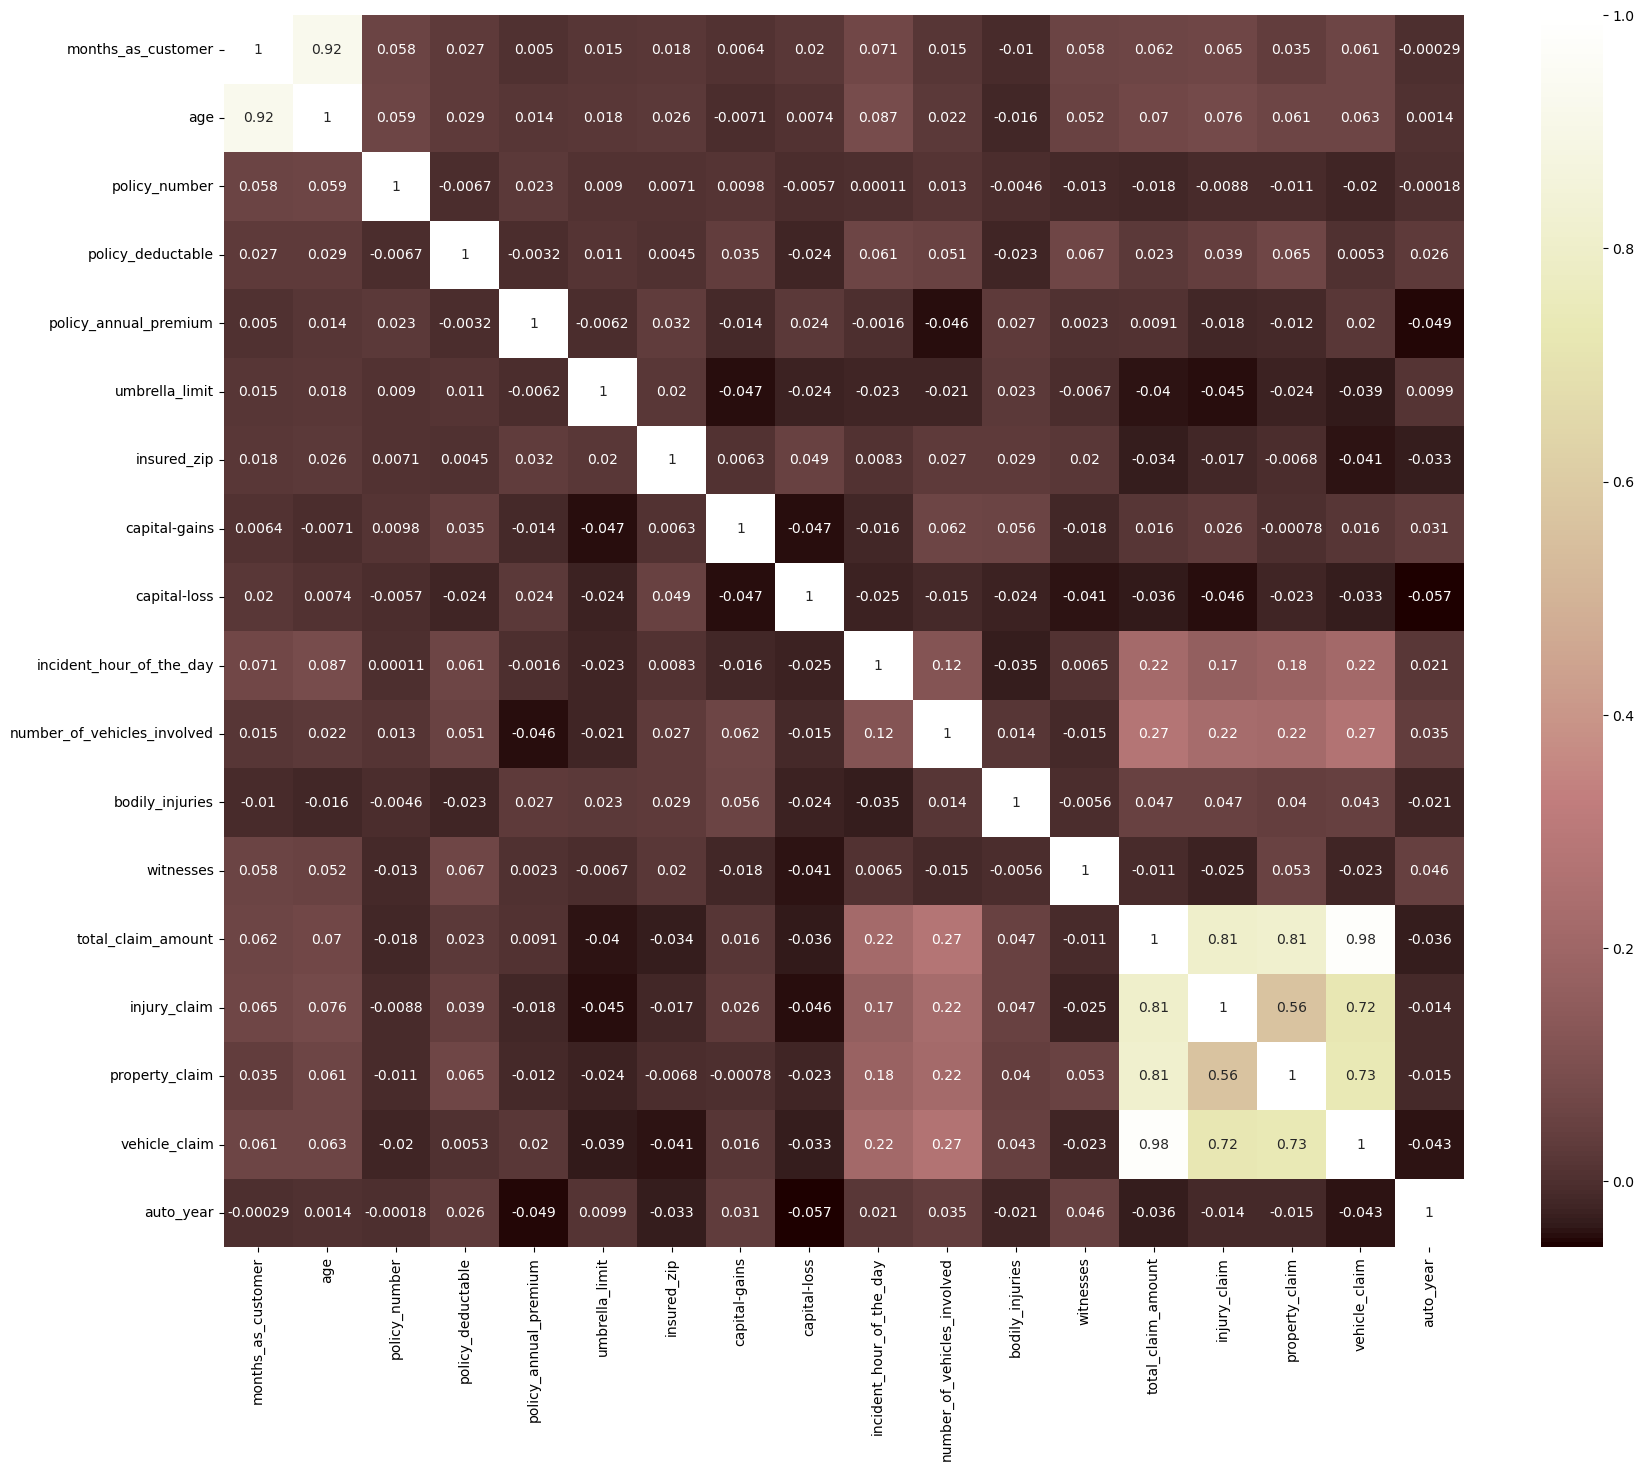

In [140]:
plt.figure(figsize=(20,16))
sns.heatmap(corr,cmap='pink',annot=True)

## Plotting Outliers

<Figure size 1200x800 with 0 Axes>

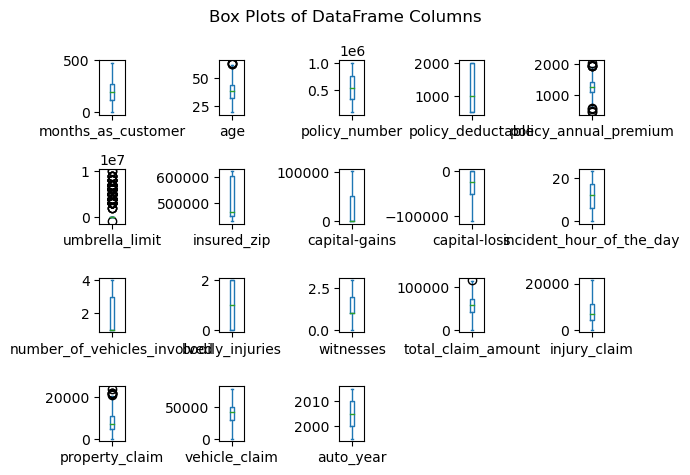

In [142]:
plt.figure(figsize=(12, 8))
df.plot(kind='box',subplots=True,layout=(4,5))
plt.suptitle("Box Plots of DataFrame Columns")
plt.tight_layout()
plt.show()

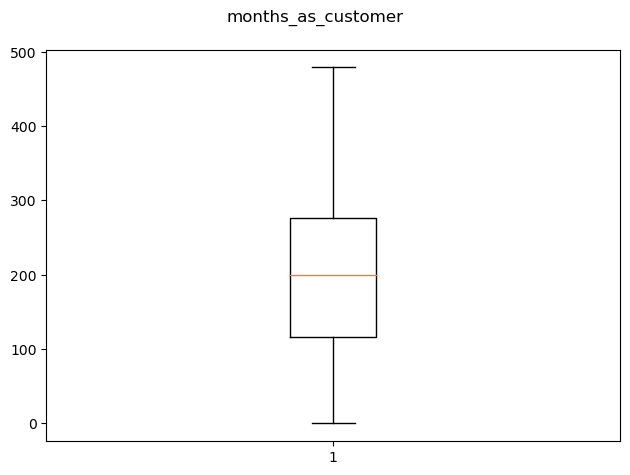

In [143]:
plt.boxplot(df['months_as_customer'])
plt.suptitle("months_as_customer")
plt.tight_layout()
plt.show()

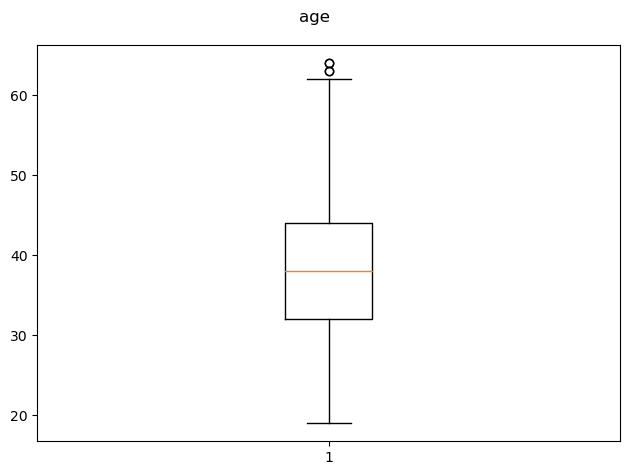

In [144]:
plt.boxplot(df['age'])
plt.suptitle("age")
plt.tight_layout()
plt.show()

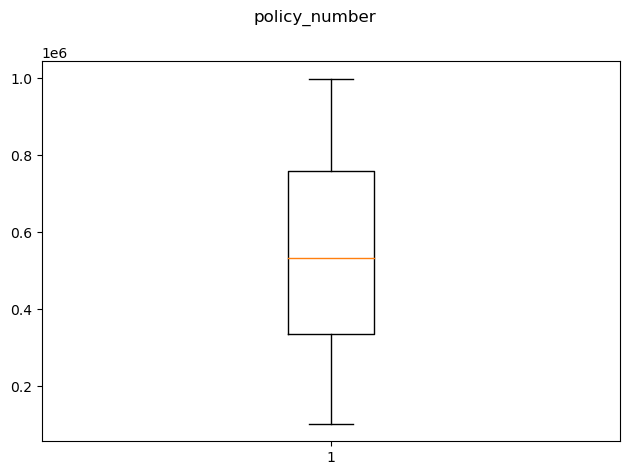

In [145]:
plt.boxplot(df['policy_number'])
plt.suptitle("policy_number")
plt.tight_layout()
plt.show()

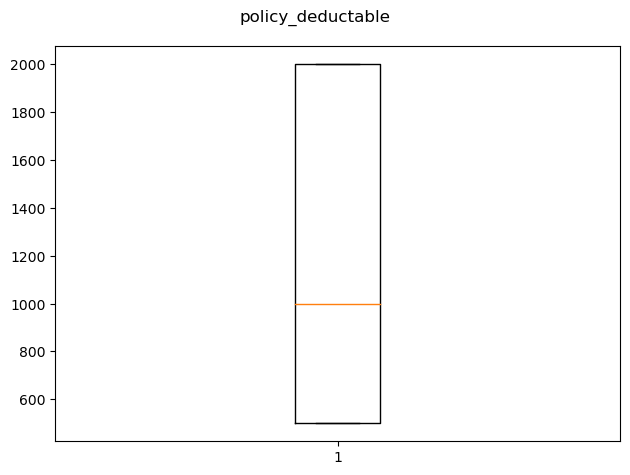

In [146]:
plt.boxplot(df['policy_deductable'])
plt.suptitle("policy_deductable")
plt.tight_layout()
plt.show()

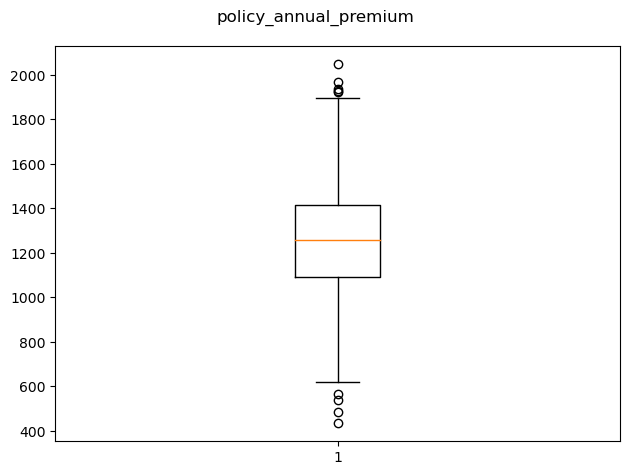

In [147]:
plt.boxplot(df['policy_annual_premium'])
plt.suptitle("policy_annual_premium")
plt.tight_layout()
plt.show()

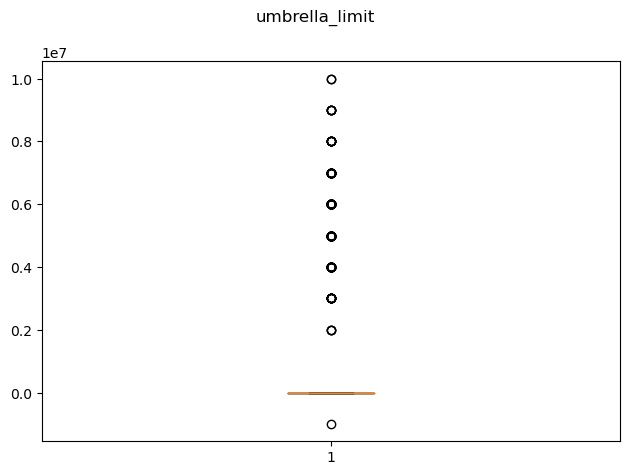

In [148]:
plt.boxplot(df['umbrella_limit'])
plt.suptitle("umbrella_limit")
plt.tight_layout()
plt.show()

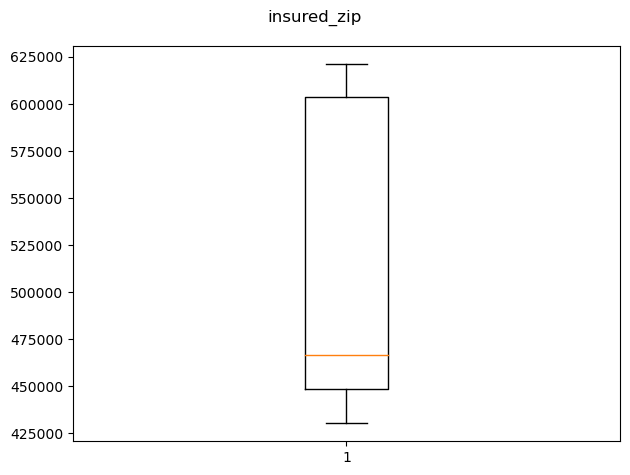

In [149]:
plt.boxplot(df['insured_zip'])
plt.suptitle("insured_zip")
plt.tight_layout()
plt.show()

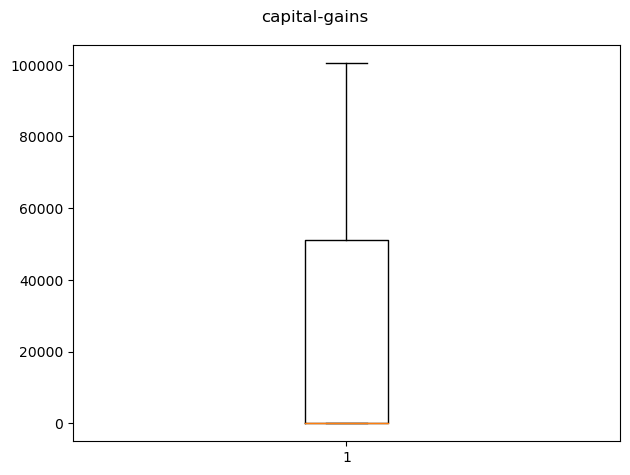

In [150]:
plt.boxplot(df['capital-gains'])
plt.suptitle("capital-gains")
plt.tight_layout()
plt.show()

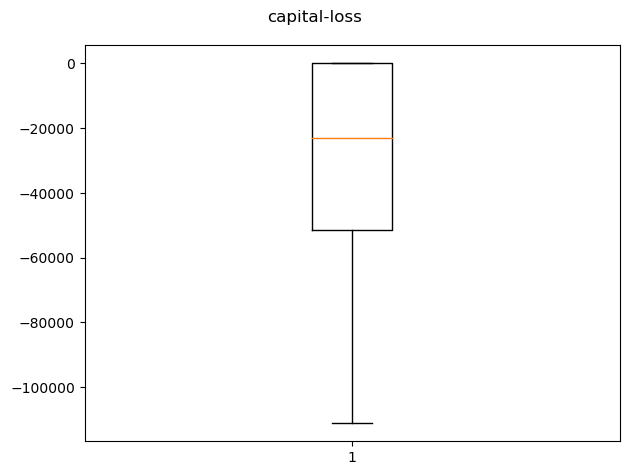

In [151]:
plt.boxplot(df['capital-loss'])
plt.suptitle("capital-loss")
plt.tight_layout()
plt.show()

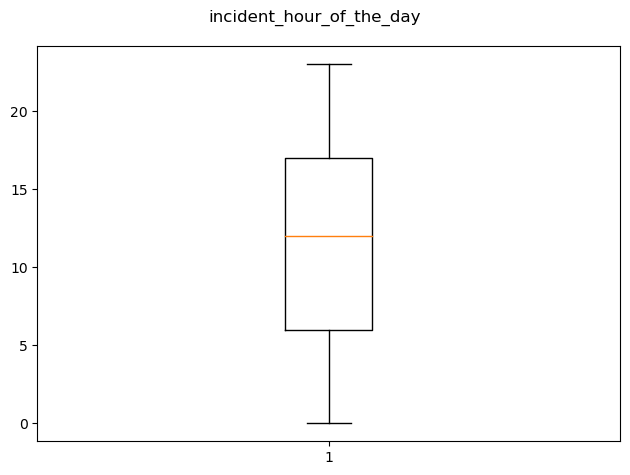

In [152]:
plt.boxplot(df['incident_hour_of_the_day'])
plt.suptitle("incident_hour_of_the_day")
plt.tight_layout()
plt.show()

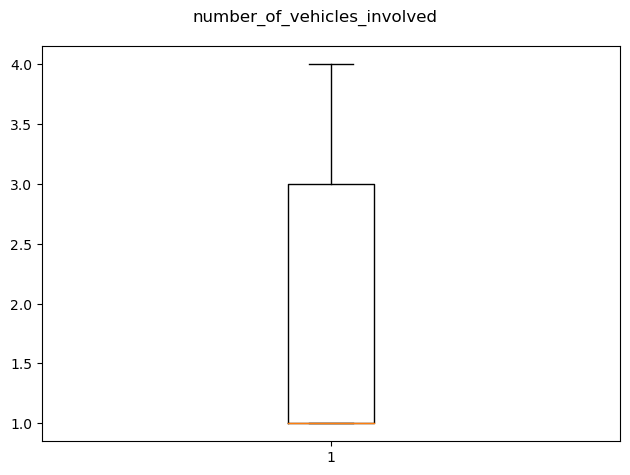

In [153]:
plt.boxplot(df['number_of_vehicles_involved'])
plt.suptitle("number_of_vehicles_involved")
plt.tight_layout()
plt.show()

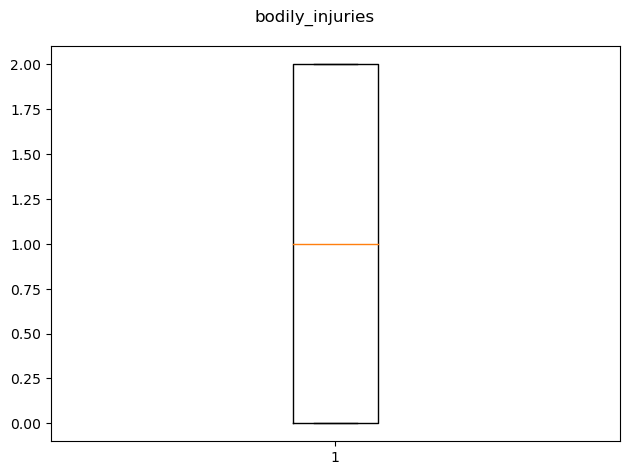

In [154]:
plt.boxplot(df['bodily_injuries'])
plt.suptitle("bodily_injuries")
plt.tight_layout()
plt.show()

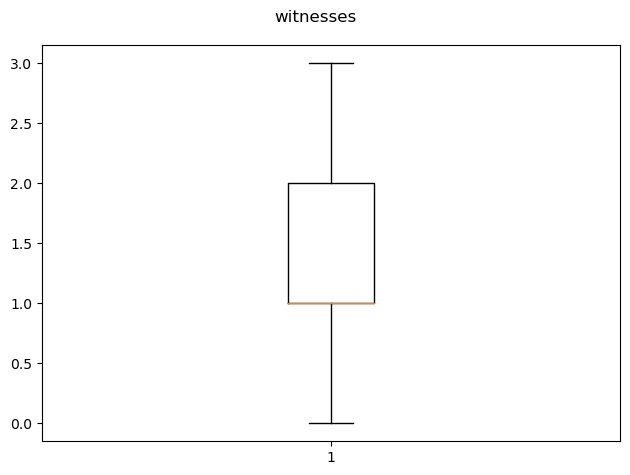

In [155]:
plt.boxplot(df['witnesses'])
plt.suptitle("witnesses")
plt.tight_layout()
plt.show()

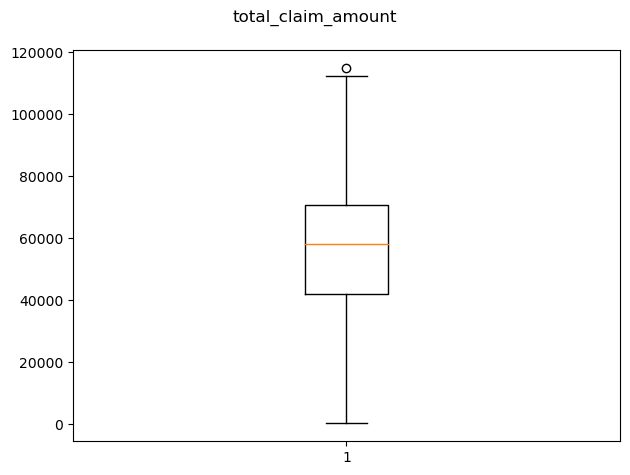

In [156]:
plt.boxplot(df['total_claim_amount'])
plt.suptitle("total_claim_amount")
plt.tight_layout()
plt.show()

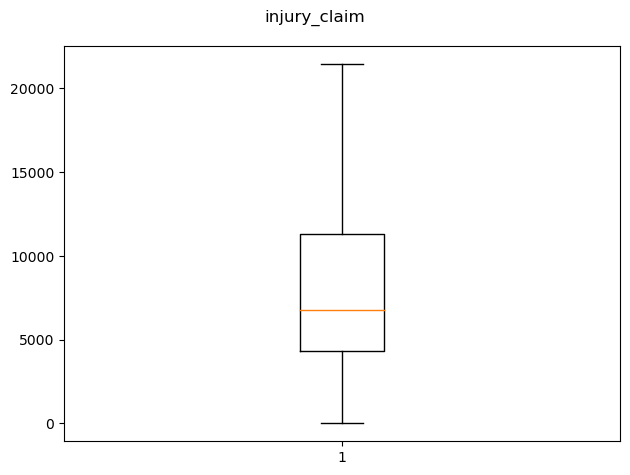

In [157]:
plt.boxplot(df['injury_claim'])
plt.suptitle("injury_claim")
plt.tight_layout()
plt.show()

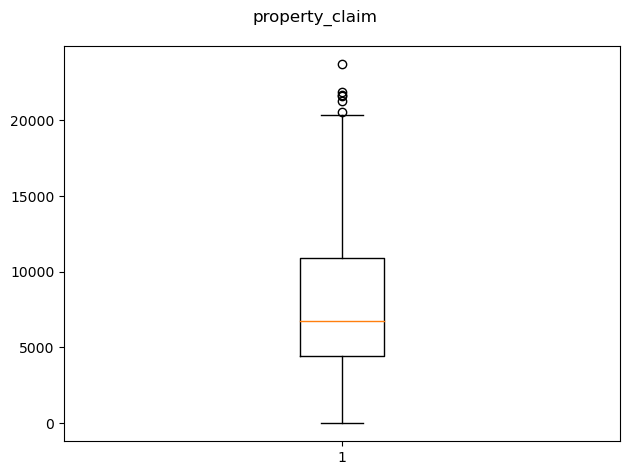

In [158]:
plt.boxplot(df['property_claim'])
plt.suptitle("property_claim")
plt.tight_layout()
plt.show()

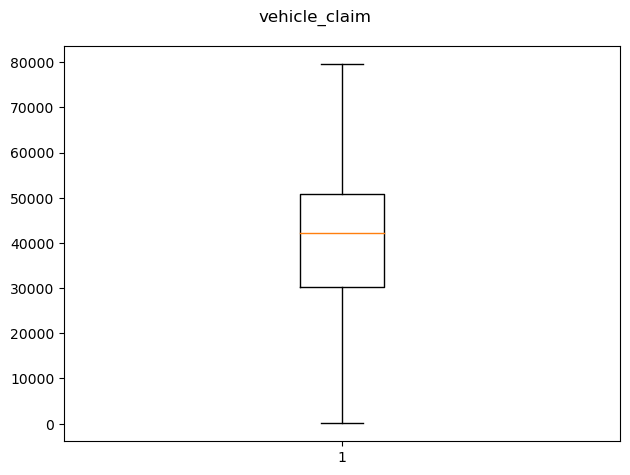

In [159]:
plt.boxplot(df['vehicle_claim'])
plt.suptitle("vehicle_claim")
plt.tight_layout()
plt.show()

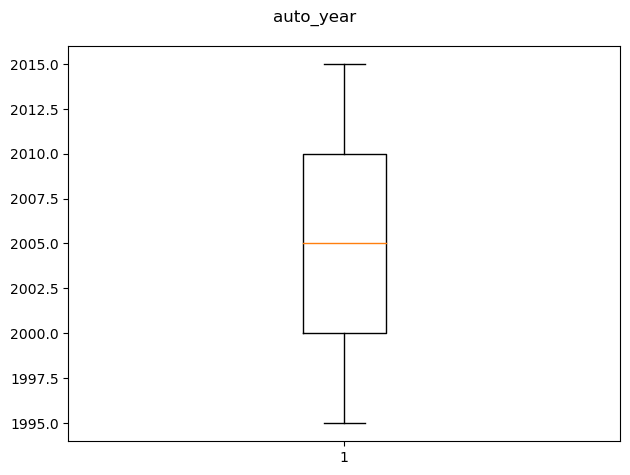

In [160]:
plt.boxplot(df['auto_year'])
plt.suptitle("auto_year")
plt.tight_layout()
plt.show()

## Data Preprocessing

## Separating Numerical and Categorical Columns

In [164]:
numeric_columns = df.select_dtypes(include=[np.number])

In [165]:
numeric_columns

months_as_customer  age  policy_number  policy_deductable  \
0                   328   48         521585               1000   
1                   228   42         342868               2000   
2                   134   29         687698               2000   
3                   256   41         227811               2000   
4                   228   44         367455               1000   
..                  ...  ...            ...                ...   
995                   3   38         941851               1000   
996                 285   41         186934               1000   
997                 130   34         918516                500   
998                 458   62         533940               2000   
999                 456   60         556080               1000   

     policy_annual_premium  umbrella_limit  insured_zip  capital-gains  \
0                  1406.91               0       466132          53300   
1                  1197.22         5000000       468176              0   
2                  1413.14         5000000       430632          35100   
3                  1415.74         6000000       608117          48900   
4                  1583.91         6000000       610706          66000   
..                     ...             ...          ...            ...   
995                1310.80               0       431289              0   
996                1436.79               0       608177          70900   
997                1383.49         3000000       442797          35100   
998                1356.92         5000000       441714              0   
999                 766.19               0       612260              0   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0               0                         5                            1   
1               0                         8                            1   
2               0                         7                            3   
3          -62400                         5                            1   
4          -46000                        20                            1   
..            ...                       ...                          ...   
995             0                        20                            1   
996             0                        23                            1   
997             0                         4                            3   
998             0                         2                            1   
999             0                         6                            1   

     bodily_injuries  witnesses  total_claim_amount  injury_claim  \
0                  1          2               71610          6510   
1                  0          0                5070           780   
2                  2          3               34650          7700   
3                  1          2               63400          6340   
4                  0          1                6500          1300   
..               ...        ...                 ...           ...   
995                0          1               87200         17440   
996                2          3              108480         18080   
997                2          3               67500          7500   
998                0          1               46980          5220   
999                0          3                5060           460   

     property_claim  vehicle_claim  auto_year  
0             13020          52080       2004  
1               780           3510       2007  
2              3850          23100       2007  
3              6340          50720       2014  
4               650           4550       2009  
..              ...            ...        ...  
995            8720          61040       2006  
996           18080          72320       2015  
997            7500          52500       1996  
998            5220          36540       1998  
999             920           3680       2007  

[100

<Figure size 1200x800 with 0 Axes>

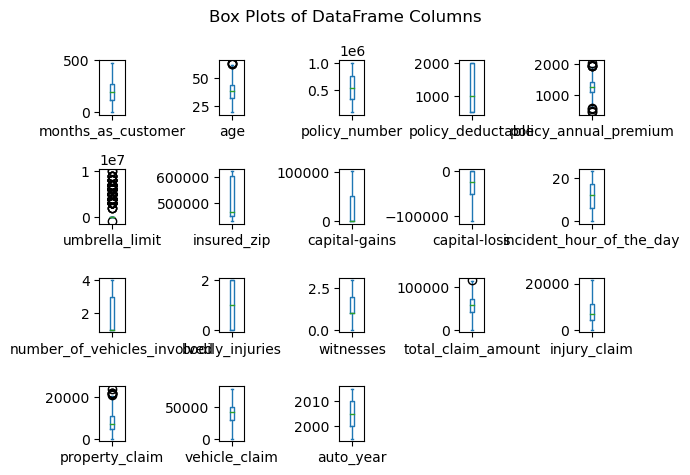

In [166]:
plt.figure(figsize=(12, 8))
numeric_columns.plot(kind='box',subplots=True,layout=(4,5))
plt.suptitle("Box Plots of DataFrame Columns")
plt.tight_layout()
plt.show()

In [167]:
cat_col=df.select_dtypes(exclude=[np.number])

In [168]:
cat_col

policy_bind_date policy_state policy_csl insured_sex  \
0         17-10-2014           OH    250/500        MALE   
1         27-06-2006           IN    250/500        MALE   
2         06-09-2000           OH    100/300      FEMALE   
3         25-05-1990           IL    250/500      FEMALE   
4         06-06-2014           IL   500/1000        MALE   
..               ...          ...        ...         ...   
995       16-07-1991           OH   500/1000      FEMALE   
996       05-01-2014           IL    100/300      FEMALE   
997       17-02-2003           OH    250/500      FEMALE   
998       18-11-2011           IL   500/1000        MALE   
999       11-11-1996           OH    250/500      FEMALE   

    insured_education_level insured_occupation insured_hobbies  \
0                        MD       craft-repair        sleeping   
1                        MD  machine-op-inspct         reading   
2                       PhD              sales     board-games   
3                       PhD       armed-forces     board-games   
4                 Associate              sales     board-games   
..                      ...                ...             ...   
995                 Masters       craft-repair       paintball   
996                     PhD     prof-specialty        sleeping   
997                 Masters       armed-forces  bungie-jumping   
998               Associate  handlers-cleaners    base-jumping   
999               Associate              sales        kayaking   

    insured_relationship incident_date             incident_type  ...  \
0                husband    25-01-2015  Single Vehicle Collision  ...   
1         other-relative    21-01-2015             Vehicle Theft  ...   
2              own-child    22-02-2015   Multi-vehicle Collision  ...   
3              unmarried    10-01-2015  Single Vehicle Collision  ...   
4              unmarried    17-02-2015             Vehicle Theft  ...   
..                   ...           ...                       ...  ...   
995            unmarried    22-02-2015  Single Vehicle Collision  ...   
996                 wife    24-01-2015  Single Vehicle Collision  ...   
997       other-relative    23-01-2015   Multi-vehicle Collision  ...   
998                 wife    26-02-2015  Single Vehicle Collision  ...   
999              husband    26-02-2015                Parked Car  ...   

    incident_severity authorities_contacted incident_state incident_city  \
0        Major Damage                Police             SC      Columbus   
1        Minor Damage                Police             VA     Riverwood   
2        Minor Damage                Police             NY      Columbus   
3        Major Damage                Police             OH     Arlington   
4        Minor Damage                  None             NY     Arlington   
..                ...                   ...            ...           ...   
995      Minor Damage                  Fire             NC    Northbrook   
996      Major Damage                  Fire             SC     Northbend   
997      Minor Damage                Police             NC     Arlington   
998      Major Damage                 Other             NY     Arlington   
999      Minor Damage                Police             WV      Columbus   

       incident_location property_damage police_report_available   auto_make  \
0         9935 4th Drive             YES                     YES        Saab   
1           6608 MLK Hwy               ?                       ?    Mercedes   
2      7121 Francis Lane              NO                      NO       Dodge   
3       6956 Maple Drive               ?                      NO   Chevrolet   
4           3041 3rd Ave              NO                      NO      Accura   
..                   ...             ...                     ...         ...   
995   6045 Andromedia St             YES                       ?       Honda   
996     3092 Texas Drive             YES                    

In [169]:
numeric_columns.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

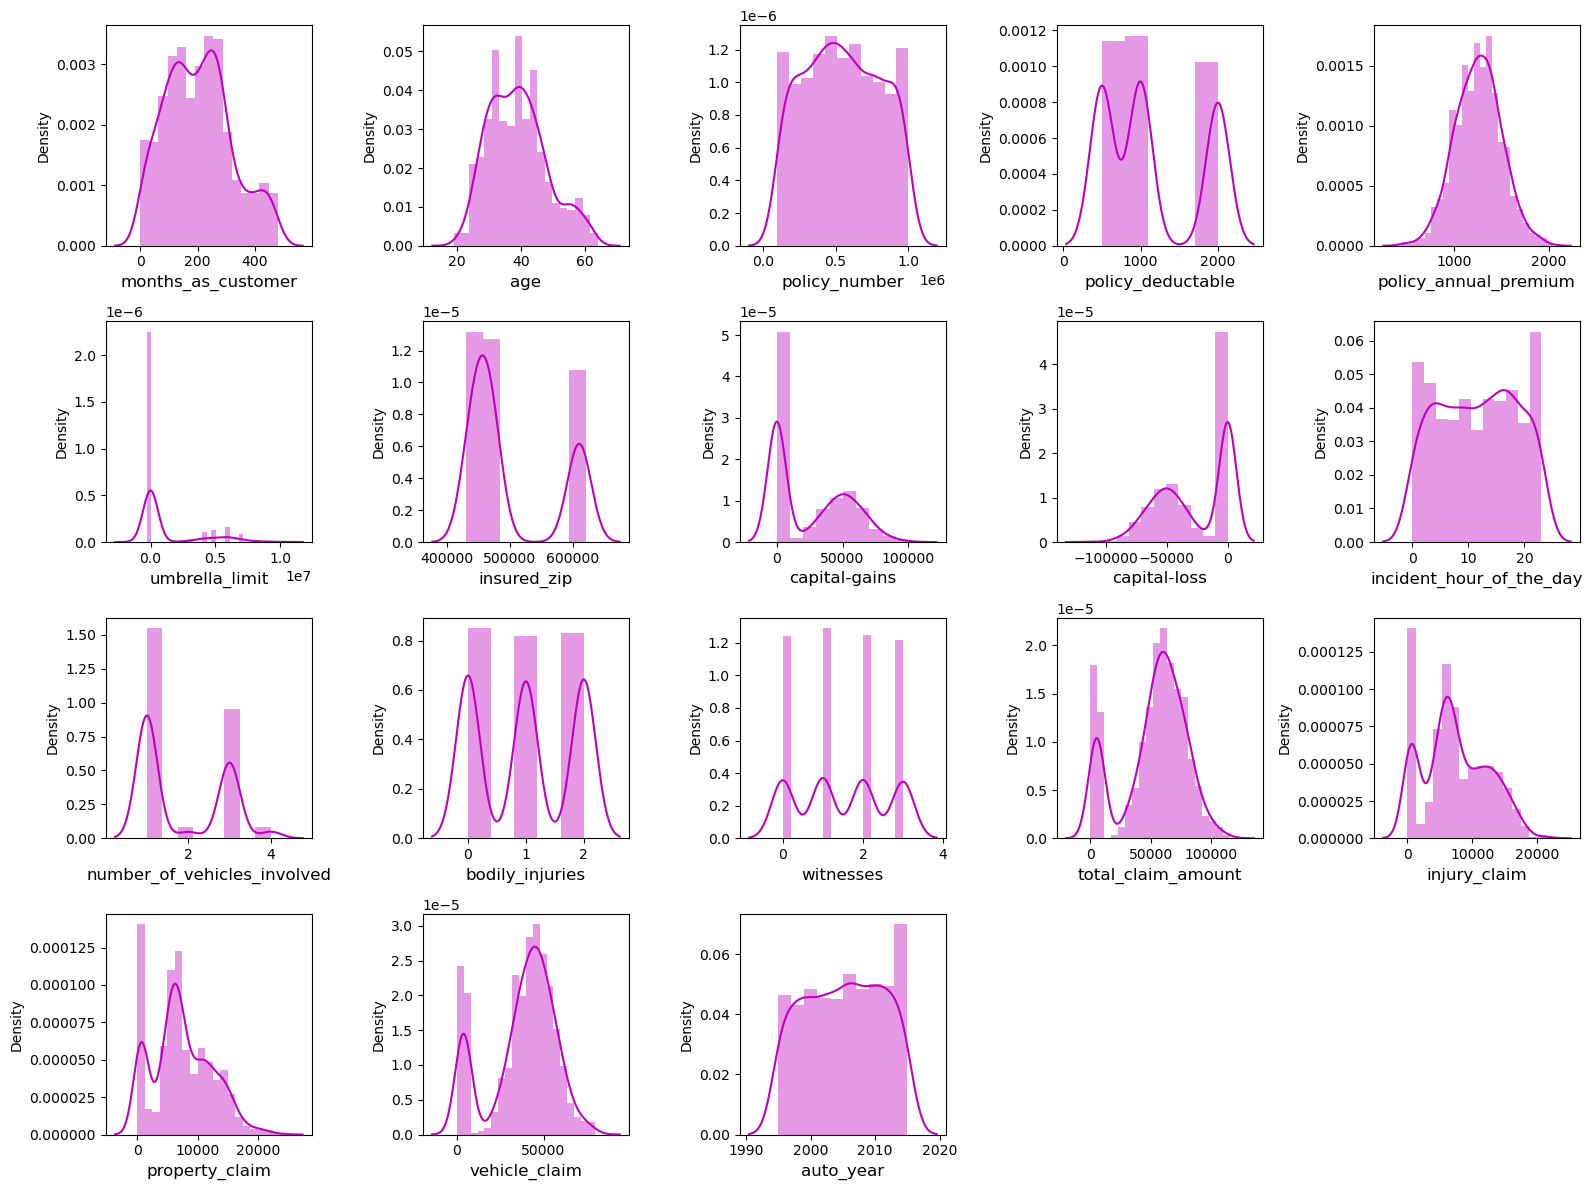

In [170]:
plt.figure(figsize=(16,12))
plotnumber=1
for i in numeric_columns.columns:
    if plotnumber<=18:
        ax=plt.subplot(4,5,plotnumber)
        sns.distplot(numeric_columns[i],color='m')
        plt.xlabel(i,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()
plt.show()

Since it is a small data set we will proceed for feature selection without removing outliers and skewness

## Encoding Categorical Columns¶

In [171]:
from sklearn.preprocessing import LabelEncoder
cat_col.select_dtypes(include=['object']).columns
label_encoders = {}
for col in cat_col:
    le = LabelEncoder()
    cat_col[col] = le.fit_transform(cat_col[col])
    label_encoders[col] = le

In [172]:
cat_col

policy_bind_date  policy_state  policy_csl  insured_sex  \
0                 532             2           1            1   
1                 821             1           1            1   
2                 186             2           0            0   
3                 766             0           1            0   
4                 181             0           2            1   
..                ...           ...         ...          ...   
995               487             2           2            0   
996               129             0           0            0   
997               509             2           1            0   
998               573             0           2            1   
999               359             2           1            0   

     insured_education_level  insured_occupation  insured_hobbies  \
0                          4                   2               17   
1                          4                   6               15   
2                          6                  11                2   
3                          6                   1                2   
4                          0                  11                2   
..                       ...                 ...              ...   
995                        5                   2               13   
996                        6                   9               17   
997                        5                   1                3   
998                        0                   5                0   
999                        0                  11               11   

     insured_relationship  incident_date  incident_type  ...  \
0                       0             49              2  ...   
1                       2             41              3  ...   
2                       3             44              0  ...   
3                       4             19              2  ...   
4                       4             34              3  ...   
..                    ...            ...            ...  ...   
995                     4             44              2  ...   
996                     5             47              2  ...   
997                     2             45              0  ...   
998                     5             52              2  ...   
999                     0             52              1  ...   

     incident_severity  authorities_contacted  incident_state  incident_city  \
0                    0                      4               4              1   
1                    1                      4               5              5   
2                    1                      4               1              1   
3                    0                      4               2              0   
4                    1                      2               1              0   
..                 ...                    ...             ...            ...   
995                  1                      1               0              4   
996                  0                      1               4              3   
997                  1                      4               0              0   
998                  0                      3               1              0   
999                  1                      4               6              1   

     incident_location  property_damage  police_report_available  auto_make  \
0                  996                2                        2         10   
1                  628                0                        0          8   
2                  685                1                        1          4   
3                  669                0                        1          3   
4                  220                1                        1          0   
..                 ...              ...                      ...        ...   
995                561                2                        0          6   
996                227                2      

In [173]:
cat_col.dtypes

policy_bind_date           int32
policy_state               int32
policy_csl                 int32
insured_sex                int32
insured_education_level    int32
insured_occupation         int32
insured_hobbies            int32
insured_relationship       int32
incident_date              int32
incident_type              int32
collision_type             int32
incident_severity          int32
authorities_contacted      int32
incident_state             int32
incident_city              int32
incident_location          int32
property_damage            int32
police_report_available    int32
auto_make                  int32
auto_model                 int32
fraud_reported             int32
dtype: object

## CONCATINATING numerical column and cat_col

In [174]:
df1=pd.merge(numeric_columns,cat_col,left_index=True,right_index=True)

In [175]:
df1

months_as_customer  age  policy_number  policy_deductable  \
0                   328   48         521585               1000   
1                   228   42         342868               2000   
2                   134   29         687698               2000   
3                   256   41         227811               2000   
4                   228   44         367455               1000   
..                  ...  ...            ...                ...   
995                   3   38         941851               1000   
996                 285   41         186934               1000   
997                 130   34         918516                500   
998                 458   62         533940               2000   
999                 456   60         556080               1000   

     policy_annual_premium  umbrella_limit  insured_zip  capital-gains  \
0                  1406.91               0       466132          53300   
1                  1197.22         5000000       468176              0   
2                  1413.14         5000000       430632          35100   
3                  1415.74         6000000       608117          48900   
4                  1583.91         6000000       610706          66000   
..                     ...             ...          ...            ...   
995                1310.80               0       431289              0   
996                1436.79               0       608177          70900   
997                1383.49         3000000       442797          35100   
998                1356.92         5000000       441714              0   
999                 766.19               0       612260              0   

     capital-loss  incident_hour_of_the_day  ...  incident_severity  \
0               0                         5  ...                  0   
1               0                         8  ...                  1   
2               0                         7  ...                  1   
3          -62400                         5  ...                  0   
4          -46000                        20  ...                  1   
..            ...                       ...  ...                ...   
995             0                        20  ...                  1   
996             0                        23  ...                  0   
997             0                         4  ...                  1   
998             0                         2  ...                  0   
999             0                         6  ...                  1   

     authorities_contacted  incident_state  incident_city  incident_location  \
0                        4               4              1                996   
1                        4               5              5                628   
2                        4               1              1                685   
3                        4               2              0                669   
4                        2               1              0                220   
..                     ...             ...            ...                ...   
995                      1               0              4                561   
996                      1               4              3                227   
997                      4               0              0                746   
998                      3               1              0                569   
999                      4               6              1                 43   

     property_damage  police_report_available  auto_make  auto_model  \
0                  2                        2         10           1   
1                  0                        0          8          12   
2                  1                        1          4          30   
3                  0                        1          3          34   
4                  1                        1          0          31   
..               ...                      ...        ...         ...   
995  

## Separating Lables and Features

In [176]:
x=df1.drop('fraud_reported',axis=1)
y=df1['fraud_reported']

In [177]:
x

months_as_customer  age  policy_number  policy_deductable  \
0                   328   48         521585               1000   
1                   228   42         342868               2000   
2                   134   29         687698               2000   
3                   256   41         227811               2000   
4                   228   44         367455               1000   
..                  ...  ...            ...                ...   
995                   3   38         941851               1000   
996                 285   41         186934               1000   
997                 130   34         918516                500   
998                 458   62         533940               2000   
999                 456   60         556080               1000   

     policy_annual_premium  umbrella_limit  insured_zip  capital-gains  \
0                  1406.91               0       466132          53300   
1                  1197.22         5000000       468176              0   
2                  1413.14         5000000       430632          35100   
3                  1415.74         6000000       608117          48900   
4                  1583.91         6000000       610706          66000   
..                     ...             ...          ...            ...   
995                1310.80               0       431289              0   
996                1436.79               0       608177          70900   
997                1383.49         3000000       442797          35100   
998                1356.92         5000000       441714              0   
999                 766.19               0       612260              0   

     capital-loss  incident_hour_of_the_day  ...  collision_type  \
0               0                         5  ...               3   
1               0                         8  ...               0   
2               0                         7  ...               2   
3          -62400                         5  ...               1   
4          -46000                        20  ...               0   
..            ...                       ...  ...             ...   
995             0                        20  ...               1   
996             0                        23  ...               2   
997             0                         4  ...               3   
998             0                         2  ...               2   
999             0                         6  ...               0   

     incident_severity  authorities_contacted  incident_state  incident_city  \
0                    0                      4               4              1   
1                    1                      4               5              5   
2                    1                      4               1              1   
3                    0                      4               2              0   
4                    1                      2               1              0   
..                 ...                    ...             ...            ...   
995                  1                      1               0              4   
996                  0                      1               4              3   
997                  1                      4               0              0   
998                  0                      3               1              0   
999                  1                      4               6              1   

     incident_location  property_damage  police_report_available  auto_make  \
0                  996                2                        2         10   
1                  628                0                        0          8   
2                  685                1                        1          4   
3                  669                0                        1          3   
4                  220                1                        1          0   
..                 ...              ...                      ...       

In [178]:
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int32

In [179]:
x.shape

(1000, 38)

In [180]:
y.shape

(1000,)

In [181]:
y.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

## Dealing with class imbalance

### Feature Scaling using Standard Scalarization

In [182]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

months_as_customer       age  policy_number  policy_deductable  \
0              1.078140  0.990836      -0.095953          -0.222383   
1              0.208995  0.334073      -0.791527           1.412784   
2             -0.608002 -1.088913       0.550566           1.412784   
3              0.452355  0.224613      -1.239334           1.412784   
4              0.208995  0.552994      -0.695834          -0.222383   
..                  ...       ...            ...                ...   
995           -1.746582 -0.103769       1.539740          -0.222383   
996            0.704407  0.224613      -1.398429          -0.222383   
997           -0.642767 -0.541611       1.448920          -1.039966   
998            2.208028  2.523284      -0.047867           1.412784   
999            2.190645  2.304363       0.038303          -0.222383   

     policy_annual_premium  umbrella_limit  insured_zip  capital-gains  \
0                 0.616705       -0.479476    -0.489529       1.011331   
1                -0.242521        1.697980    -0.461008      -0.901927   
2                 0.642233        1.697980    -0.984885       0.358023   
3                 0.652886        2.133471     1.491682       0.853388   
4                 1.341980        2.133471     1.527808       1.467210   
..                     ...             ...          ...            ...   
995               0.222884       -0.479476    -0.975717      -0.901927   
996               0.739141       -0.479476     1.492519       1.643100   
997               0.520739        0.826998    -0.815138       0.358023   
998               0.411866        1.697980    -0.830250      -0.901927   
999              -2.008710       -0.479476     1.549492      -0.901927   

     capital-loss  incident_hour_of_the_day  ...  collision_type  \
0        0.953851                 -0.956261  ...        1.254675   
1        0.953851                 -0.524475  ...       -1.566933   
2        0.953851                 -0.668404  ...        0.314139   
3       -1.267577                 -0.956261  ...       -0.626397   
4       -0.683741                  1.202666  ...       -1.566933   
..            ...                       ...  ...             ...   
995      0.953851                  1.202666  ...       -0.626397   
996      0.953851                  1.634452  ...        0.314139   
997      0.953851                 -1.100189  ...        1.254675   
998      0.953851                 -1.388046  ...        0.314139   
999      0.953851                 -0.812332  ...       -1.566933   

     incident_severity  authorities_contacted  incident_state  incident_city  \
0            -1.260614               1.196963        0.351762      -0.962196   
1            -0.195906               1.196963        0.815829       0.995476   
2            -0.195906               1.196963       -1.040437      -0.962196   
3            -1.260614               1.196963       -0.576371      -1.451614   
4            -0.195906              -0.109052       -1.040437      -1.451614   
..                 ...                    ...             ...            ...   
995          -0.195906              -0.762060       -1.504504       0.506058   
996          -1.260614              -0.762060        0.351762       0.016640   
997          -0.195906               1.196963       -1.504504      -1.451614   
998          -1.260614               0.543955       -1.040437      -1.451614   
999          -0.195906               1.196963        1.279896      -0.962196   

     incident_location  property_damage  police_report_available  auto_make  \
0             1.719927         1.303656                 1.270313   0.856466   
1             0.445137        -1.160722                -1.198712   0.360539   
2             0.642591         0.071467                 0.035801  -0.631315   
3             0.587166        -1.160722                 0.035801  -0.879279   
4            -0.968217         0.071467                 0.035801  -1.623169   
..         

Here in fit method we are giving the data onthe method and the method will do diffenent analysis, it will find out relationship pattern and then we are using transform methos which will on the basis of previous learning the data will be changed

We have scaled the data using Standard Scalarization method to overcome the issue of biasness

In [183]:
x.shape

(1000, 38)

In [184]:
y.shape

(1000,)

In [185]:
y.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

## Checking Variance Inflation Factor(VIF)

In [186]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
                    for i in range(len(x.columns))]
vif['Features']=x.columns

vif

VIF values                     Features
0     6.838211           months_as_customer
1     6.855296                          age
2     1.031858                policy_number
3     1.037514            policy_deductable
4     1.041779        policy_annual_premium
5     1.030735               umbrella_limit
6     1.034386                  insured_zip
7     1.036770                capital-gains
8     1.041638                 capital-loss
9     1.107073     incident_hour_of_the_day
10    5.127968  number_of_vehicles_involved
11    1.025295              bodily_injuries
12    1.044527                    witnesses
13         inf           total_claim_amount
14         inf                 injury_claim
15         inf               property_claim
16         inf                vehicle_claim
17    1.041835                    auto_year
18    1.028526             policy_bind_date
19    1.038523                 policy_state
20    1.031794                   policy_csl
21    1.028807                  insured_sex
22    1.042206      insured_education_level
23    1.020499           insured_occupation
24    1.052199              insured_hobbies
25    1.051795         insured_relationship
26    1.034905                incident_date
27    5.121613                incident_type
28    1.718920               collision_type
29    1.213370            incident_severity
30    1.079521        authorities_contacted
31    1.046600               incident_state
32    1.030551                incident_city
33    1.039502            incident_location
34    1.038843              property_damage
35    1.031054      police_report_available
36    1.072161                    auto_make
37    1.069530                   auto_model

The infinite correlation shows that a perfect or near-perfect correlation with other features. So we will drop total claim amount, injury_claim, property_claim, vehicle_claim columns

In [100]:
data = x.drop(['total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim'], axis=1,inplace =True)

In [101]:
vif=pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
                    for i in range(len(x.columns))]
vif['Features']=x.columns

vif

VIF values                     Features
0     6.778162           months_as_customer
1     6.793231                          age
2     1.031503                policy_number
3     1.027193            policy_deductable
4     1.037189        policy_annual_premium
5     1.028924               umbrella_limit
6     1.031211                  insured_zip
7     1.036019                capital-gains
8     1.036658                 capital-loss
9     1.094560     incident_hour_of_the_day
10    5.127905  number_of_vehicles_involved
11    1.020064              bodily_injuries
12    1.034044                    witnesses
13    1.038040                    auto_year
14    1.028378             policy_bind_date
15    1.032941                 policy_state
16    1.026191                   policy_csl
17    1.026108                  insured_sex
18    1.031909      insured_education_level
19    1.018762           insured_occupation
20    1.047695              insured_hobbies
21    1.047927         insured_relationship
22    1.031940                incident_date
23    5.111834                incident_type
24    1.299072               collision_type
25    1.151405            incident_severity
26    1.071913        authorities_contacted
27    1.044362               incident_state
28    1.027938                incident_city
29    1.035384            incident_location
30    1.036831              property_damage
31    1.030318      police_report_available
32    1.066187                    auto_make
33    1.068545                   auto_model

In [102]:
x.shape

(1000, 34)

In [103]:
y.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

## Oversampling

In [104]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=43)
X_resampled, y_resampled = smote.fit_resample(x, y)

In [105]:
y_resampled.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

Key Observations

We use oversampling to balance the imbalance class in the y dataset which is our lebel dataset

## Spliting the data for training and testing¶

In [106]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=43)

In [107]:
x_train.shape

(1054, 34)

In [108]:
x_test.shape

(452, 34)

In [109]:
y_train.shape

(1054,)

In [110]:
y_test.shape

(452,)

## Feature Scalling

In [111]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [112]:
# Fit the scaler to the training data
scaler.fit(x_train)

StandardScaler()

In [113]:
# Transform the training and testing data
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

Key Observations

We performed feature scaling and used standard scaler to scale the x_train x_test data.

## Model Building

### Finding the best random state
Since it a large dataset iterating millions of datas in a loop will take forever to give a result so i took fixed random state 42, to get the best accuracy

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size = 0.30, random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print('Best accuracy is', maxAccu, 'at random_state', maxRS)

Best accuracy is 0.915929203539823 at random_state 8


##### We got the best accuracy of 0.91 at random state 8

In [117]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [118]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
add=AdaBoostClassifier()
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()
bc=BaggingClassifier()
et=ExtraTreesClassifier()

In [122]:
print('Accuracy score, Confusion Matrix and Classification report for different Models')
print('\n')
models=[lg,gnb,svc,dtc,knn,add,rf,gb,bc,et]
best_accuracy=0
best_model=None
for m in models:
    x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.30,random_state=8)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    
    
    #Evaluate the model
    accuracy=accuracy_score(y_test,pred)
    print('Accuracy score of',m)
    print(round((accuracy_score(y_test,pred)),3))
    print('Confusion Matrix of',m)
    print(confusion_matrix(y_test,pred))
    print('Classification Report of',m)
    print(classification_report(y_test,pred))
    print('\n')
    
    if accuracy>best_accuracy:
        best_model=m
        best_accuracy=accuracy
        best_pred=pred
        
print('\nBest Performing Model:',best_model)
print('Accuracy Score:',round(best_accuracy,3))

Accuracy score, Confusion Matrix and Classification report for different Models


Accuracy score of LogisticRegression()
0.752
Confusion Matrix of LogisticRegression()
[[180  69]
 [ 43 160]]
Classification Report of LogisticRegression()
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       249
           1       0.70      0.79      0.74       203

    accuracy                           0.75       452
   macro avg       0.75      0.76      0.75       452
weighted avg       0.76      0.75      0.75       452



Accuracy score of GaussianNB()
0.774
Confusion Matrix of GaussianNB()
[[186  63]
 [ 39 164]]
Classification Report of GaussianNB()
              precision    recall  f1-score   support

           0       0.83      0.75      0.78       249
           1       0.72      0.81      0.76       203

    accuracy                           0.77       452
   macro avg       0.77      0.78      0.77       452
weighted avg       0.78      0.

##### The Highest accuracy we got is 0.925 through x, in ExtraTreesClassifier, so i will be proceeding with that

## Cross Validation Score

In [123]:
from sklearn.model_selection import cross_val_score
models=[lg,gnb,svc,dtc,knn,add,rf,gb,bc,et]
for m in models:
    score=cross_val_score(m,X_resampled,y_resampled,cv=5)
    print(m,'Cross Validation score is:')
    print(round(score.mean(),3))
    
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Difference between Accuracy and cross validation score is:',round(accuracy_score(y_test,pred)-score.mean(),3))
    print('\n')

LogisticRegression() Cross Validation score is:
0.746
Difference between Accuracy and cross validation score is: 0.006


GaussianNB() Cross Validation score is:
0.755
Difference between Accuracy and cross validation score is: 0.019


SVC() Cross Validation score is:
0.869
Difference between Accuracy and cross validation score is: -0.001


DecisionTreeClassifier() Cross Validation score is:
0.841
Difference between Accuracy and cross validation score is: 0.013


KNeighborsClassifier() Cross Validation score is:
0.665
Difference between Accuracy and cross validation score is: -0.052


AdaBoostClassifier() Cross Validation score is:
0.843
Difference between Accuracy and cross validation score is: 0.042


RandomForestClassifier() Cross Validation score is:
0.877
Difference between Accuracy and cross validation score is: 0.025


GradientBoostingClassifier() Cross Validation score is:
0.876
Difference between Accuracy and cross validation score is: 0.022


BaggingClassifier() Cross Validatio

Key Observation

The models with the highest cross-validation scores are ExtraTreesClassifier (0.915), RandomForestClassifier (0.877), and GradientBoostingClassifier (0.876). These models seem to have relatively good performance and generalization ability.

LogisticRegression and GaussianNB have lower cross-validation scores but similar accuracy scores, indicating that they might be performing consistently on both training and unseen data.

SVC has a high accuracy score, but its cross-validation score is slightly lower, suggesting that it might be overfitting the training data.

KNeighborsClassifier has the lowest cross-validation score and a noticeable difference between accuracy and cross-validation score, indicating potential overfitting or poor generalization.

So I will proceed with ExtraTrees Classifier

#### ExtraTree Classifier is our best model

## Hyper Parameter Tuning

In [124]:
# ExtraTree Classifier
from sklearn.model_selection import GridSearchCV

parameters={'criterion':['gini','entropy'],
            'random_state':[10,50,1000],
            'max_depth':[0,10,20],
            'n_jobs':[-2,-1,1],
            'n_estimators':[50,100,200,300]}

In [125]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [126]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [127]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 1000}

In [128]:
Final_model=ExtraTreesClassifier(criterion='gini',max_depth= 20,n_estimators=200,n_jobs=-2,random_state=1000)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

92.47787610619469


## Plotting ROC and compare AUC for all the models used

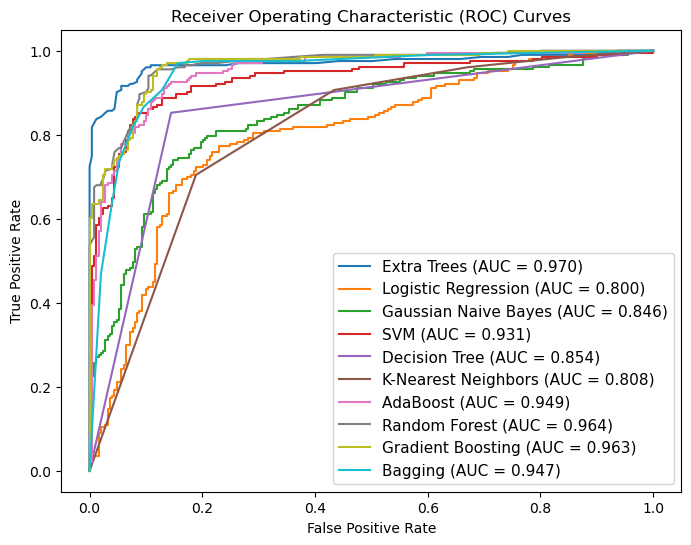

In [140]:
#Plotting for all the models used here
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

# Plot the ROC curve for each classifier
classifiers = [
    ('Extra Trees', et),
    ('Logistic Regression', lg),
    ('Gaussian Naive Bayes', gnb),
    ('SVM', svc),
    ('Decision Tree', dtc),
    ('K-Nearest Neighbors', knn),
    ('AdaBoost', add),
    ('Random Forest', rf),
    ('Gradient Boosting', gb),
    ('Bagging', bc)
]

for name, classifier in classifiers:
    if name == 'SVM':
        y_score = classifier.decision_function(x_test)
    else:
        y_score = classifier.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

# Set the legend and display the plot
plt.legend(prop={'size': 11}, loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.show()

## Saving The Model

In [130]:
#Since the Model without Outliers performing best! We will select that DataFrame.
#Saving the Model
import pickle
filename='insurance_claim.pickle'
pickle.dump(rf,open(filename,'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,

In [131]:
a =np.array(y_test)
predicted=np.array(rf.predict(x_test))
insurance=pd.DataFrame({'Orginal':a,'Predicted':predicted}, index=range(len(a)))
insurance

Orginal  Predicted
0          1          1
1          0          0
2          0          0
3          1          1
4          1          1
..       ...        ...
447        0          1
448        0          0
449        1          1
450        0          0
451        1          1

[452 rows x 2 columns]